In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
%%time
df = pd.read_csv("../data/train.csv")
# 4min

Wall time: 4min 59s


In [3]:
df.columns

Index([u'date_time', u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_ci', u'srch_co', u'srch_adults_cnt',
       u'srch_children_cnt', u'srch_rm_cnt', u'srch_destination_id',
       u'srch_destination_type_id', u'is_booking', u'cnt', u'hotel_continent',
       u'hotel_country', u'hotel_market', u'hotel_cluster'],
      dtype='object')

In [4]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
dtypes: float64(1), int64(20), object(3)

col :  site_name


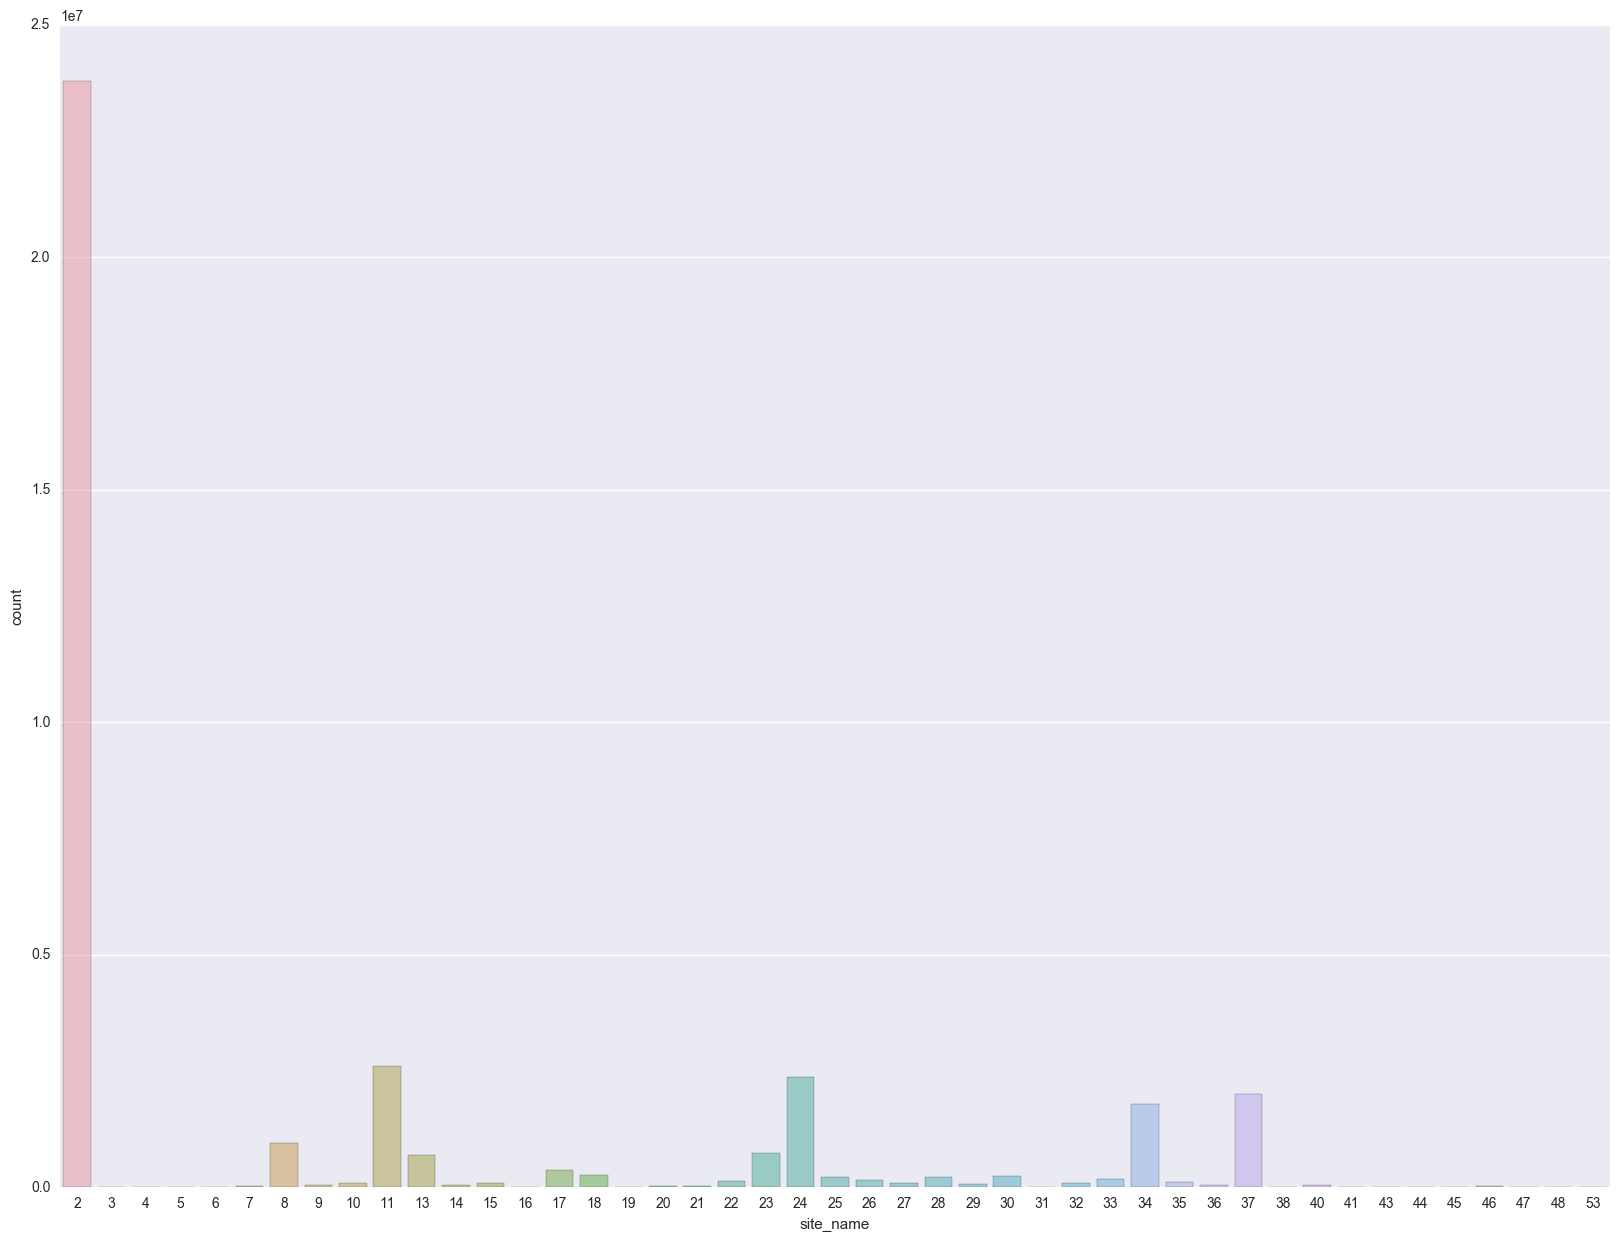

col :  posa_continent


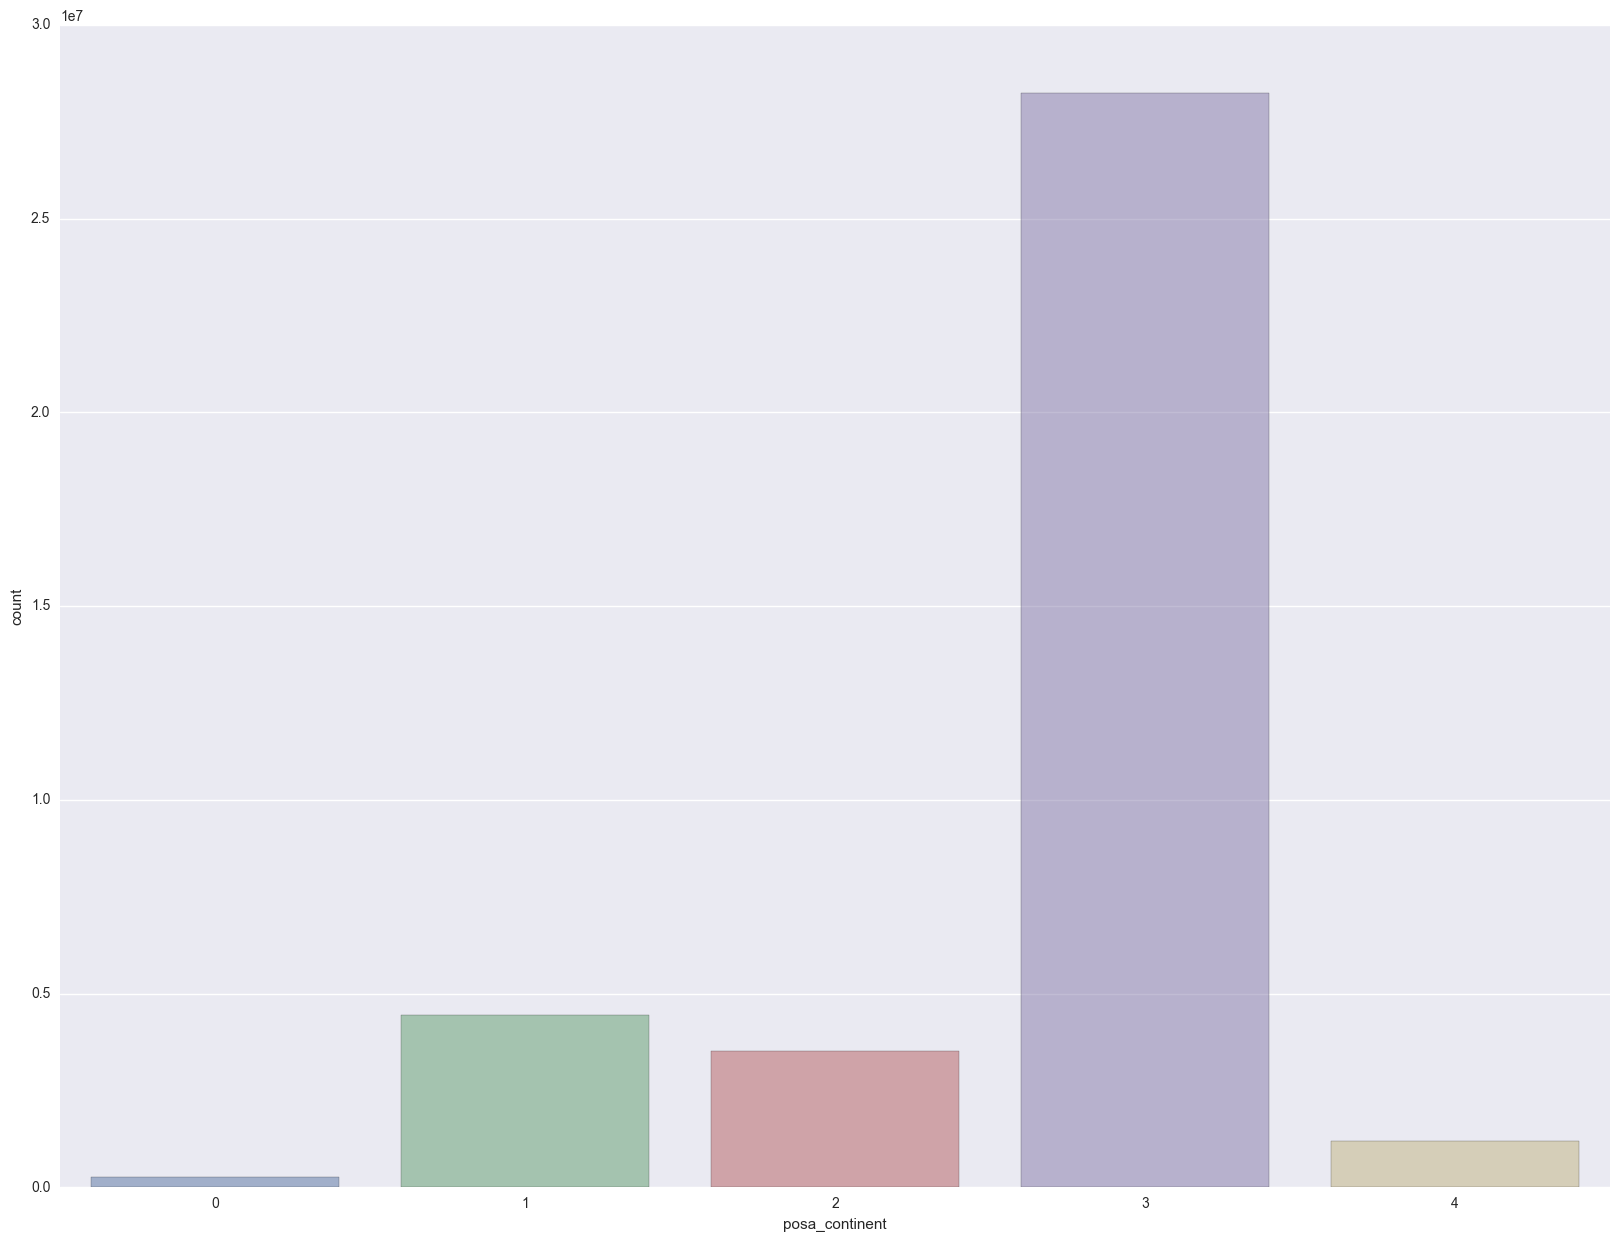

col :  user_location_country


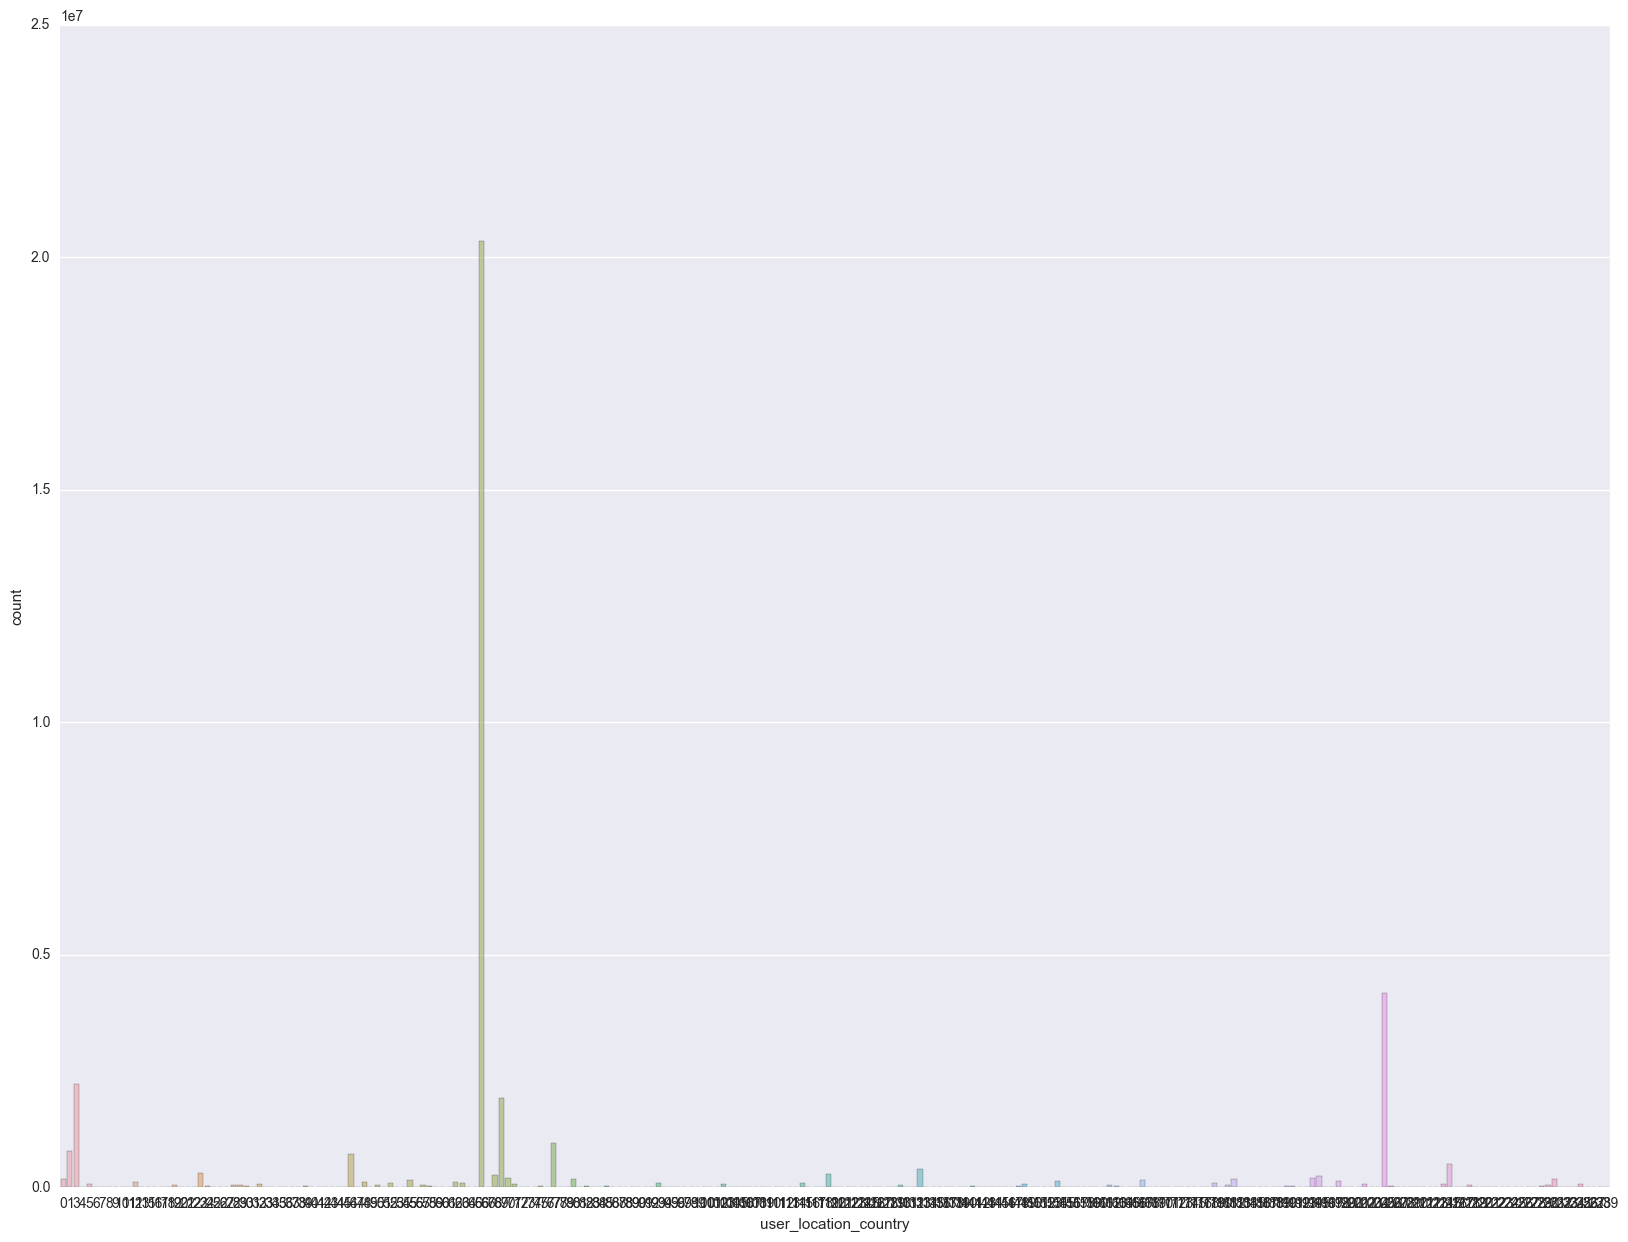

col :  user_location_region


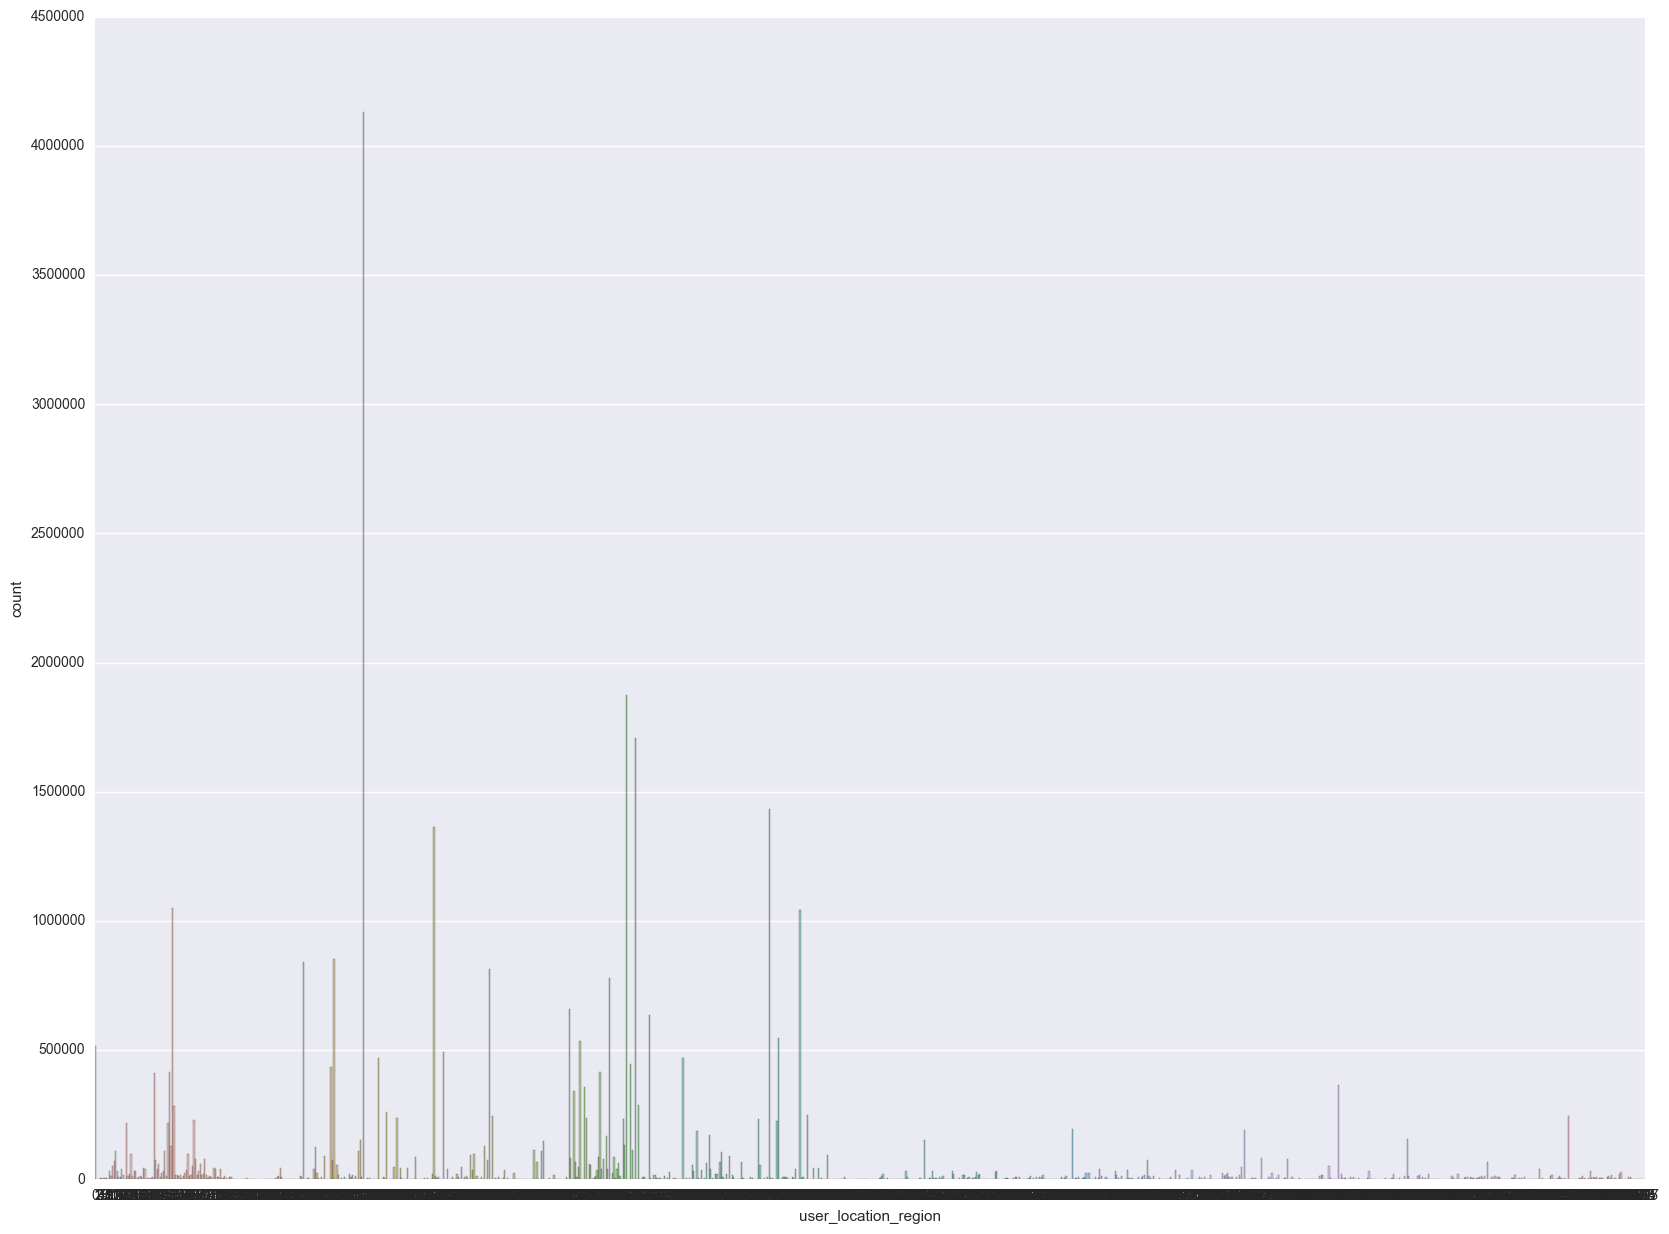

col :  user_location_city


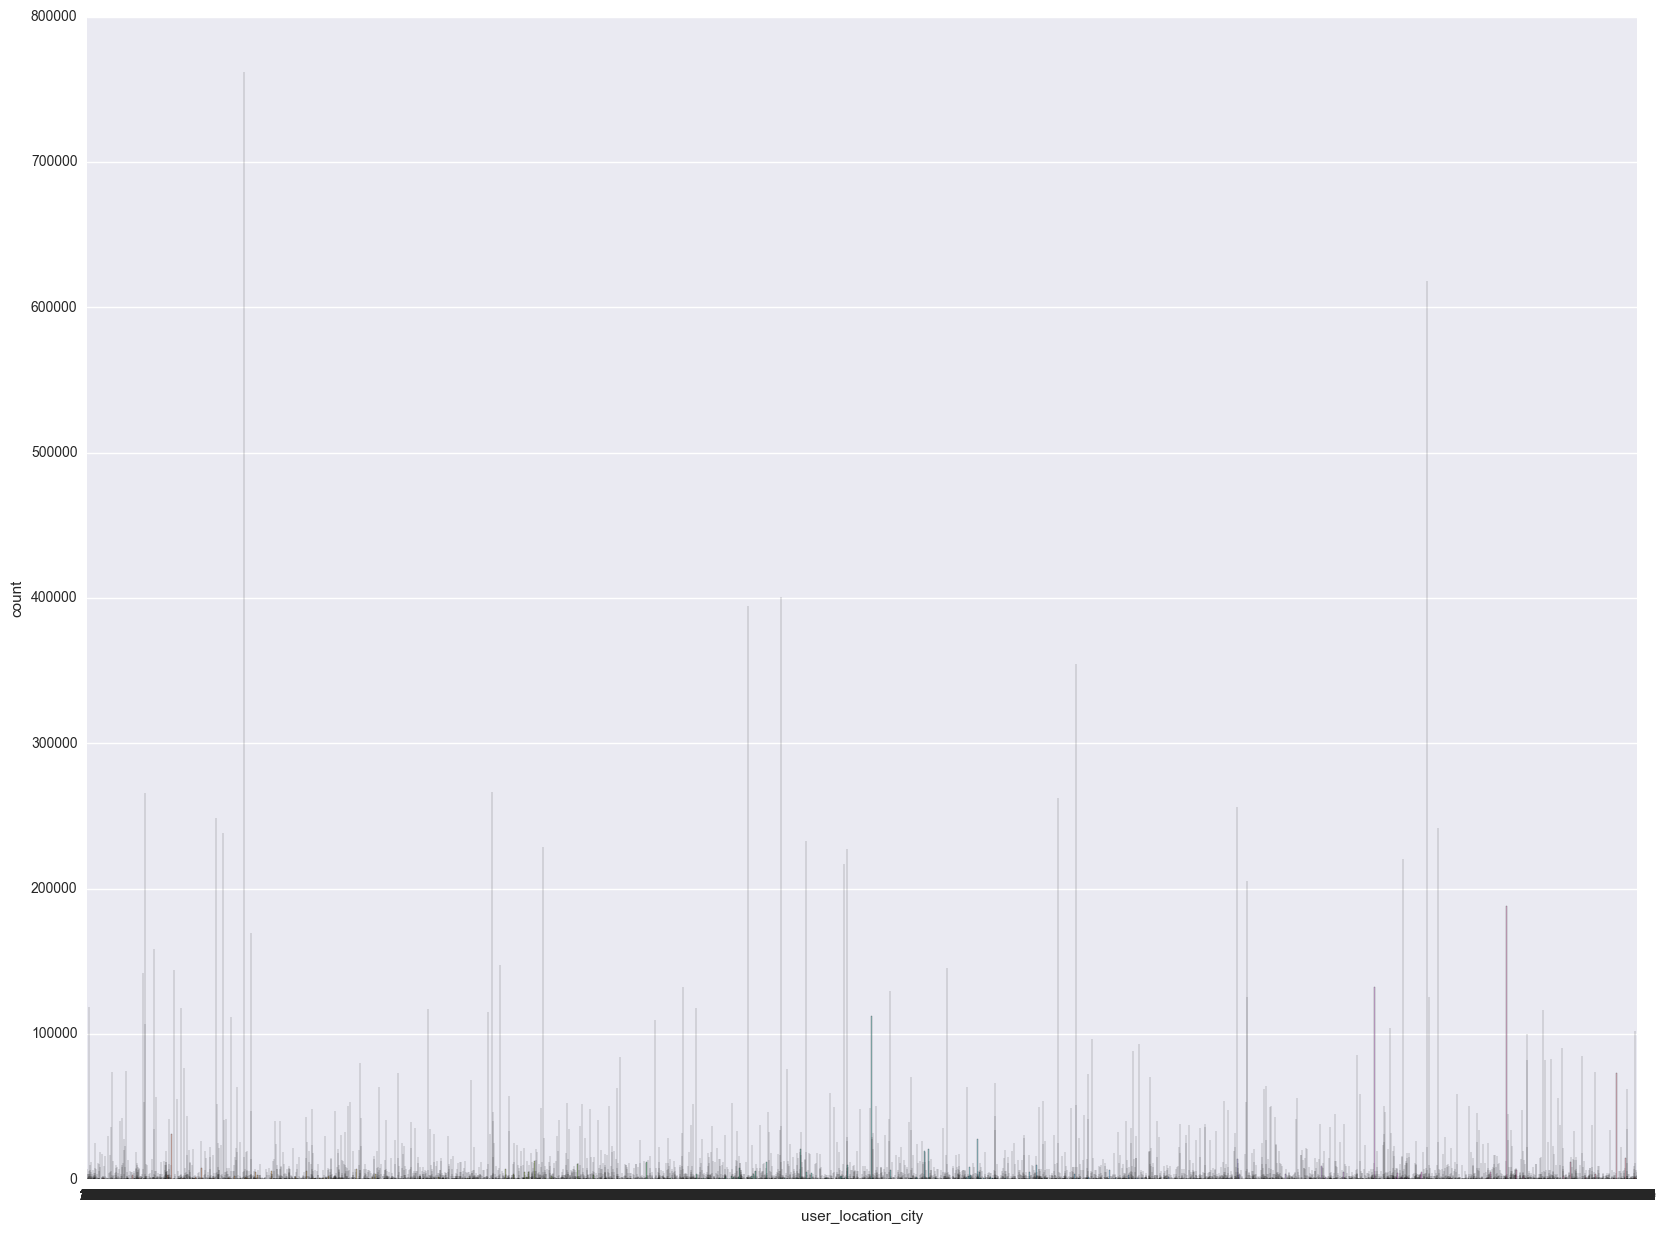

col :  is_mobile


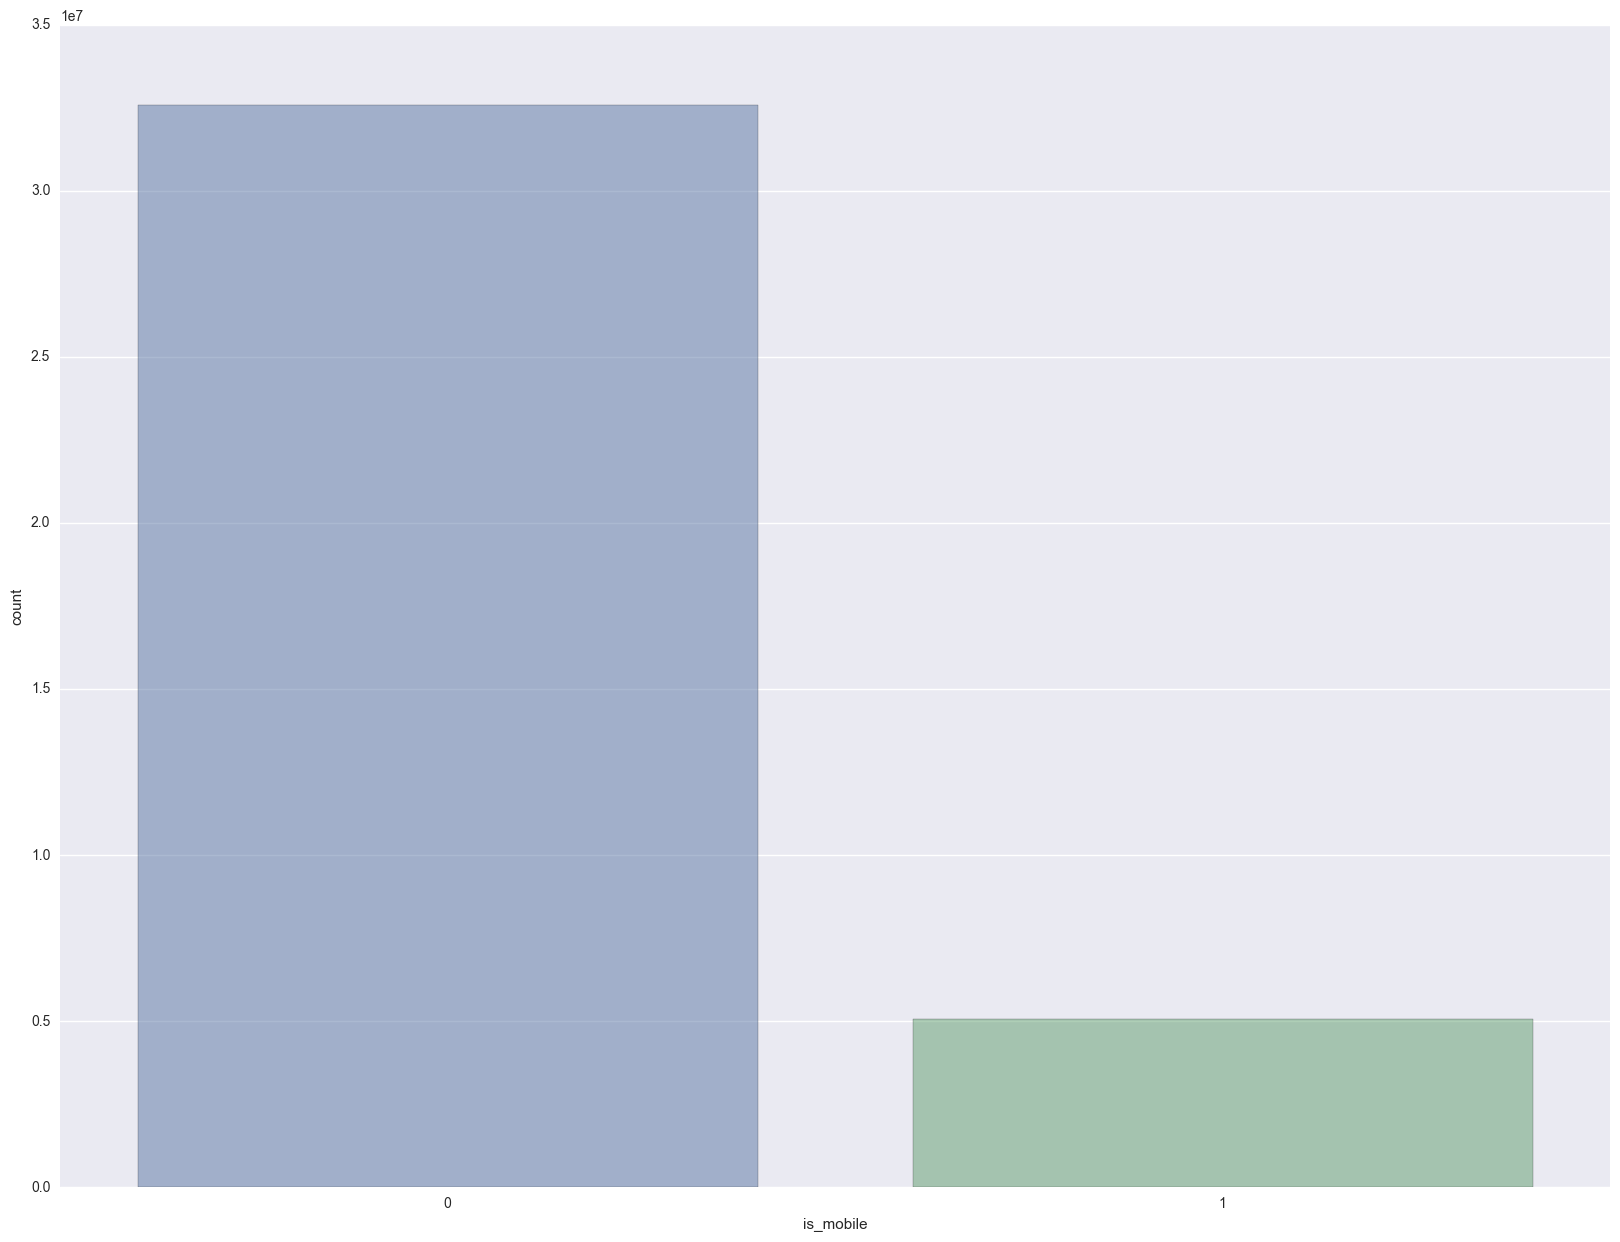

col :  is_package


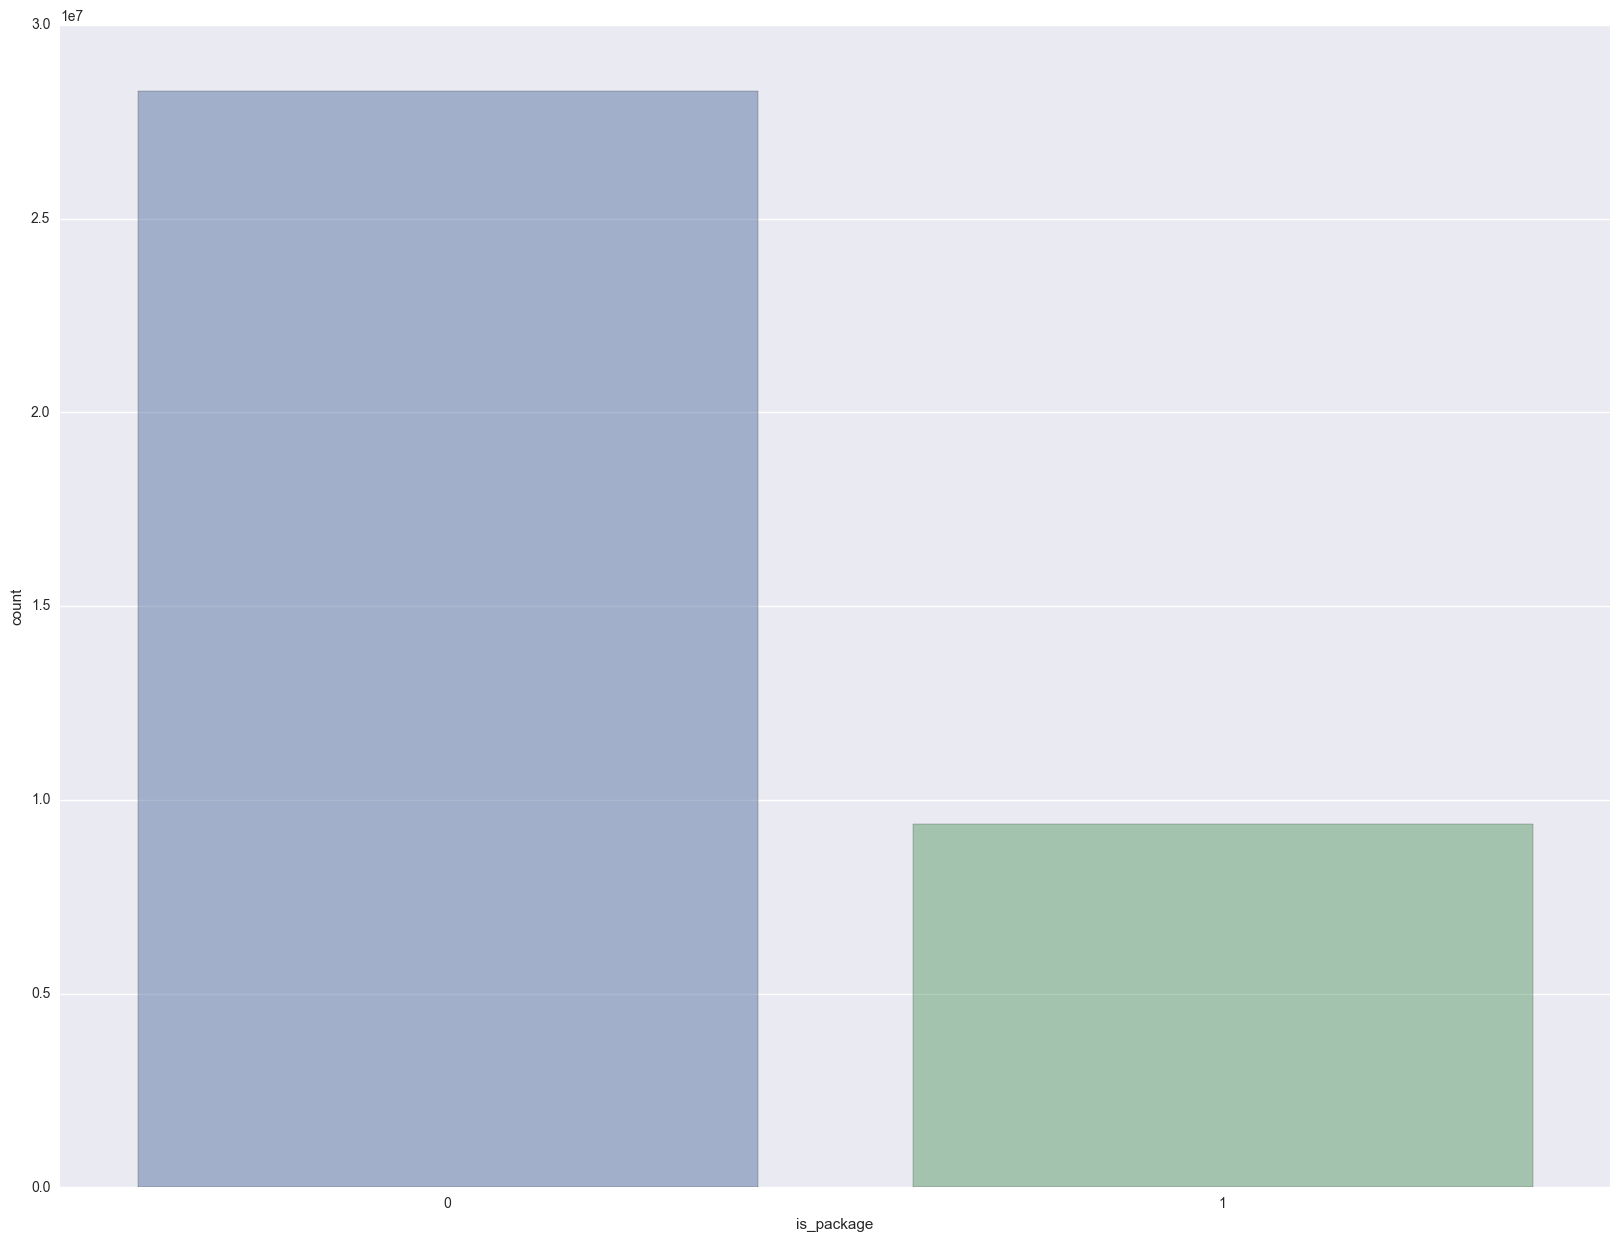

col :  channel


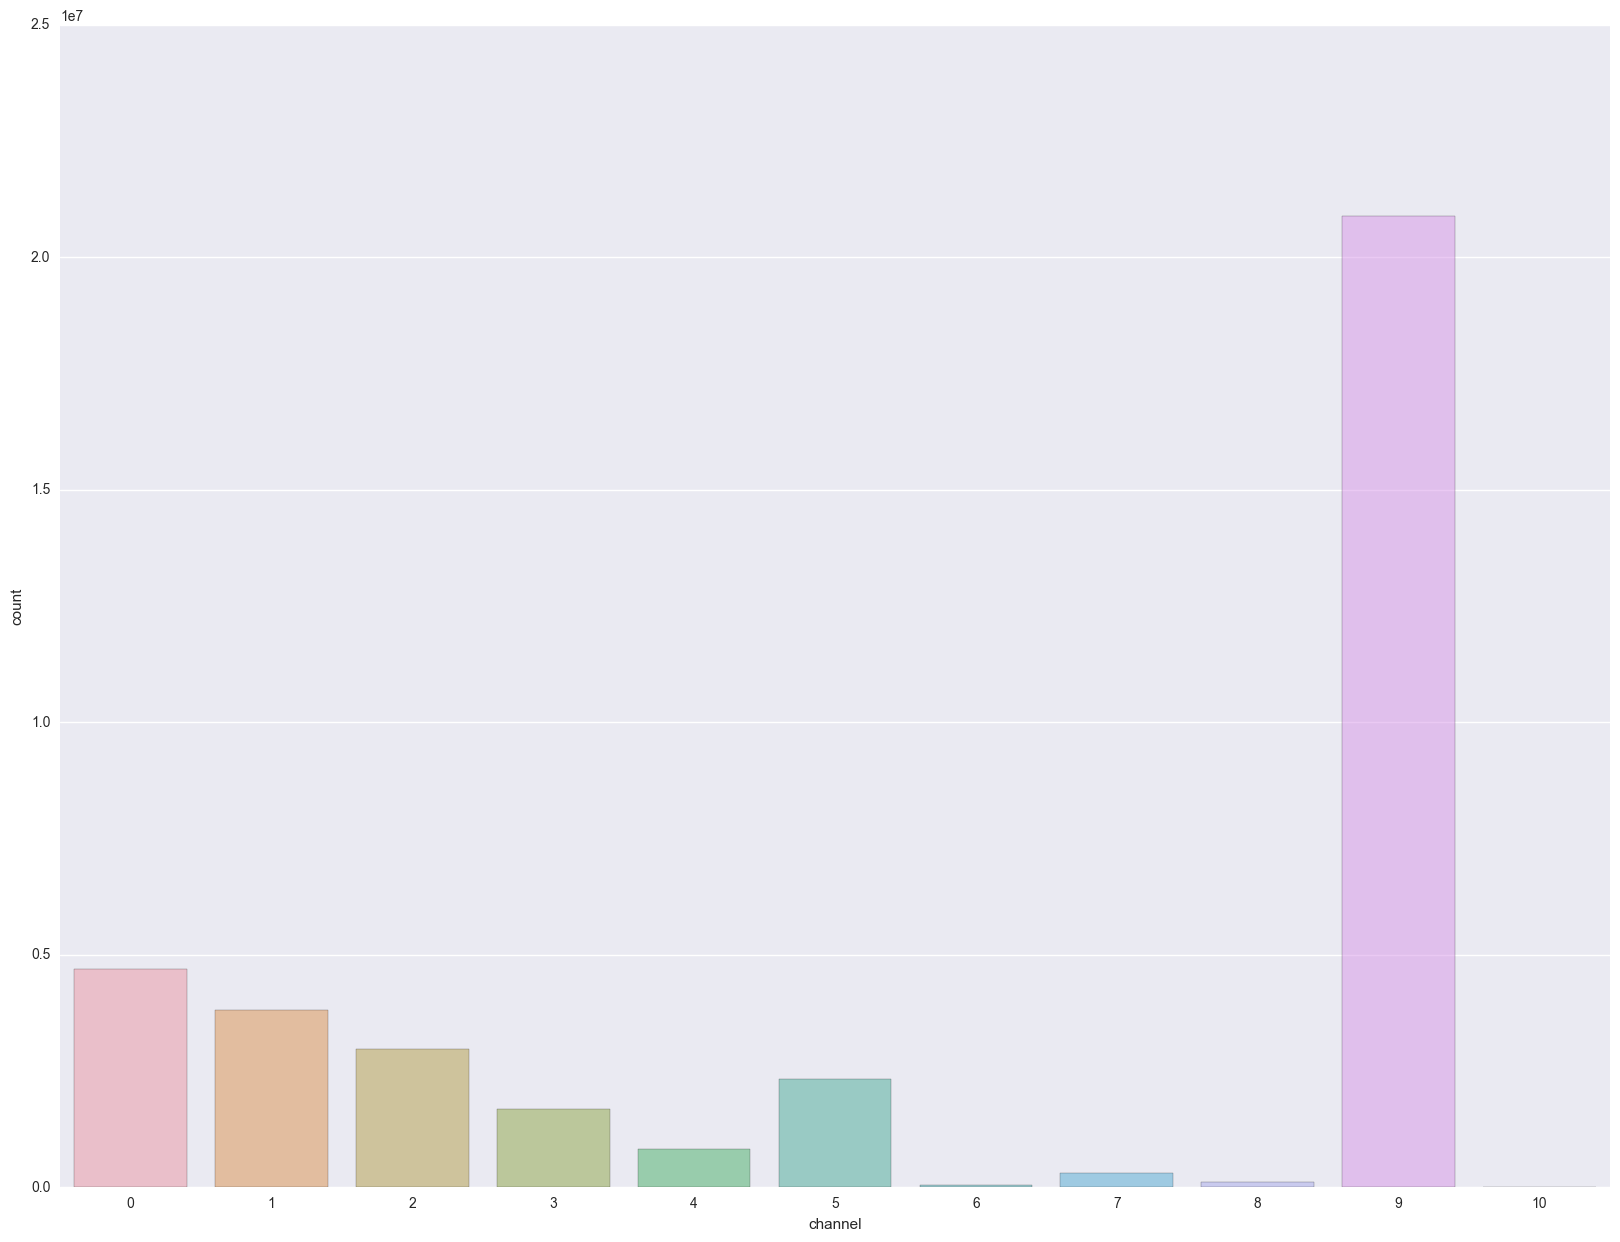

col :  srch_ci


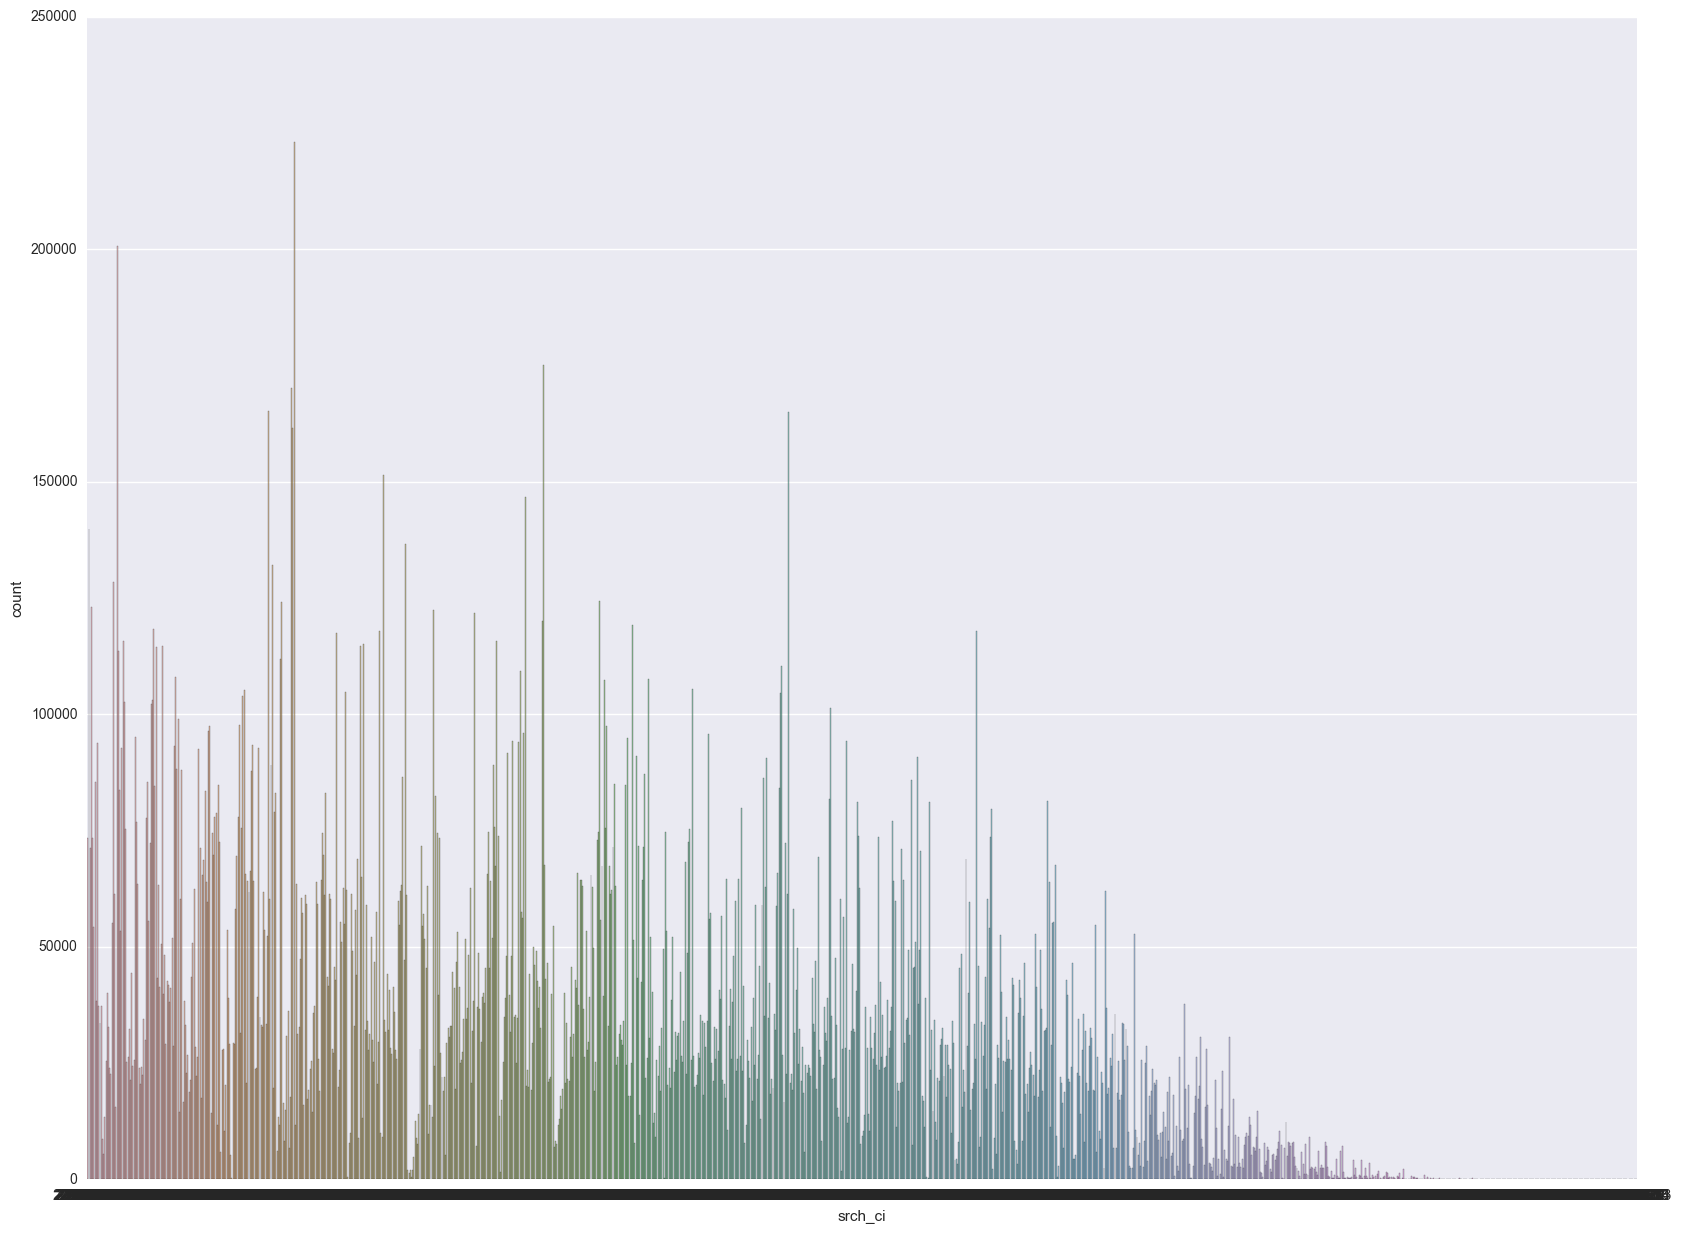

col :  srch_co


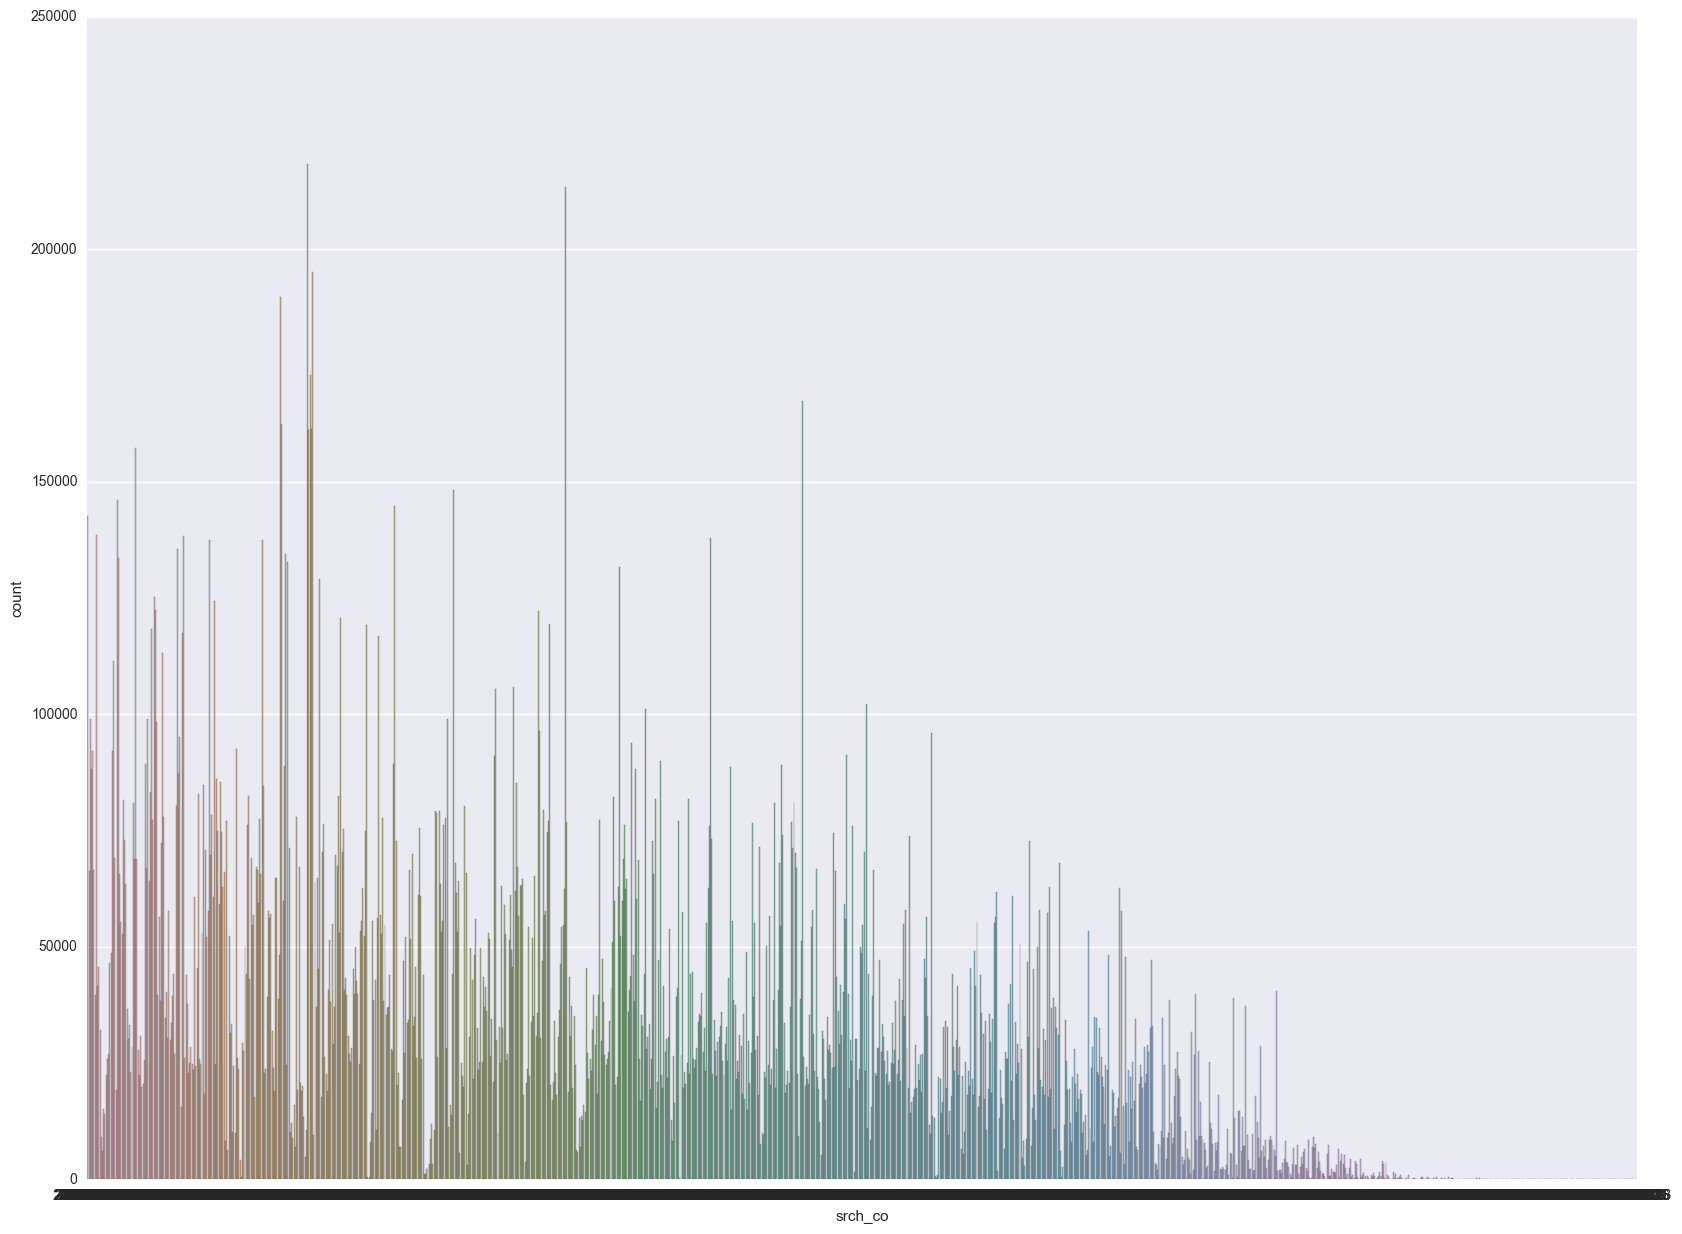

col :  srch_adults_cnt


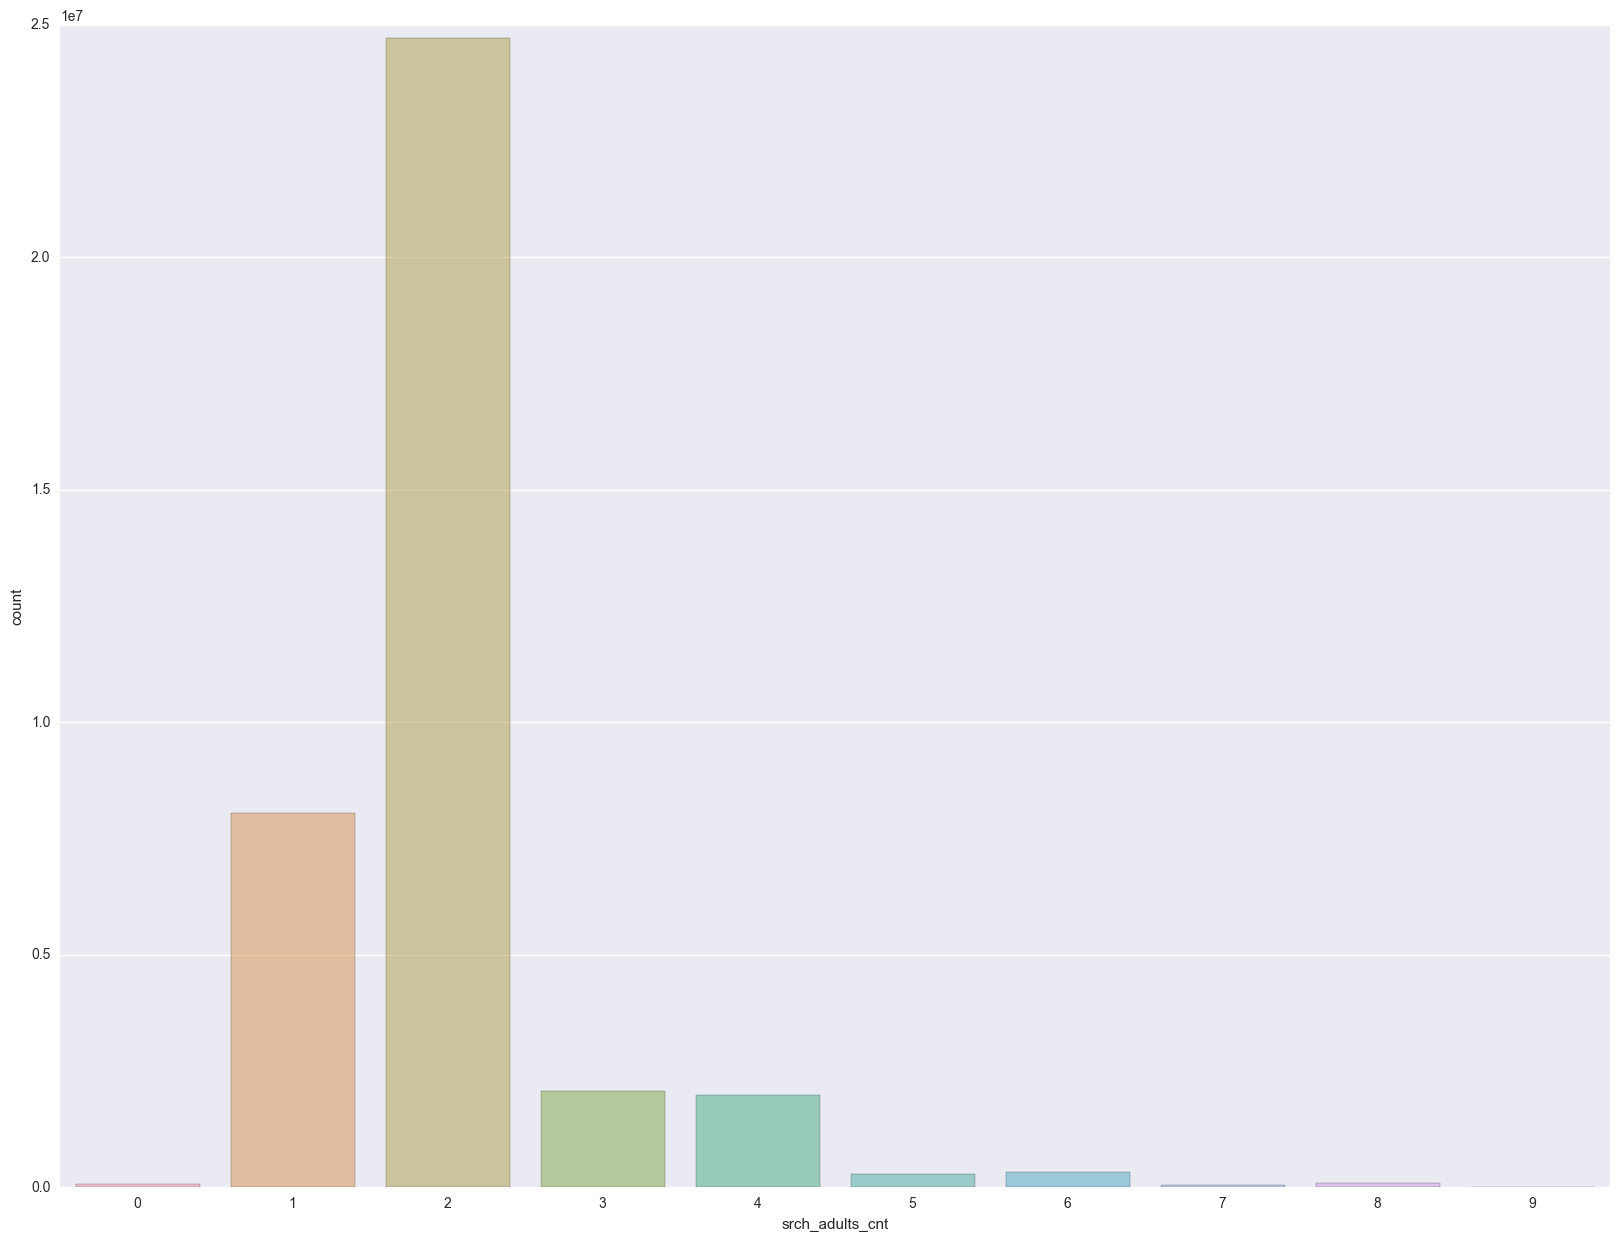

col :  srch_children_cnt


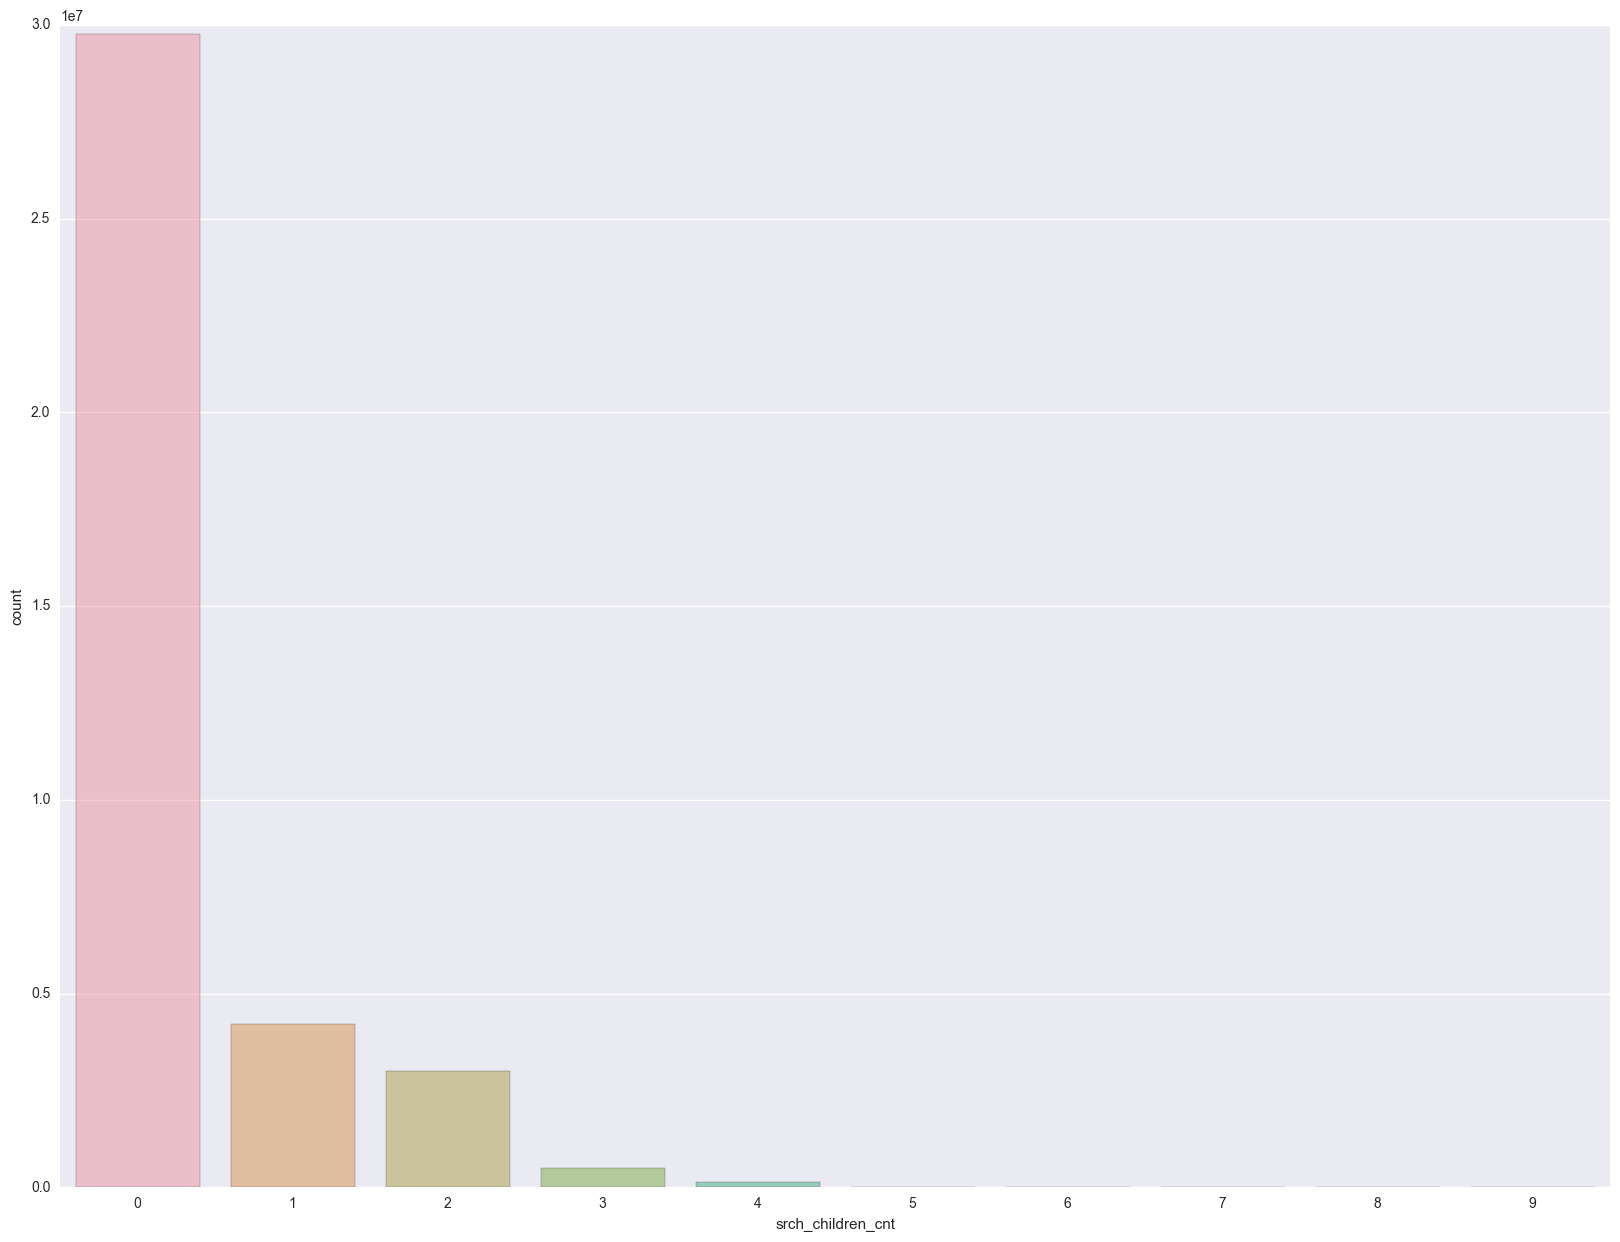

col :  srch_rm_cnt


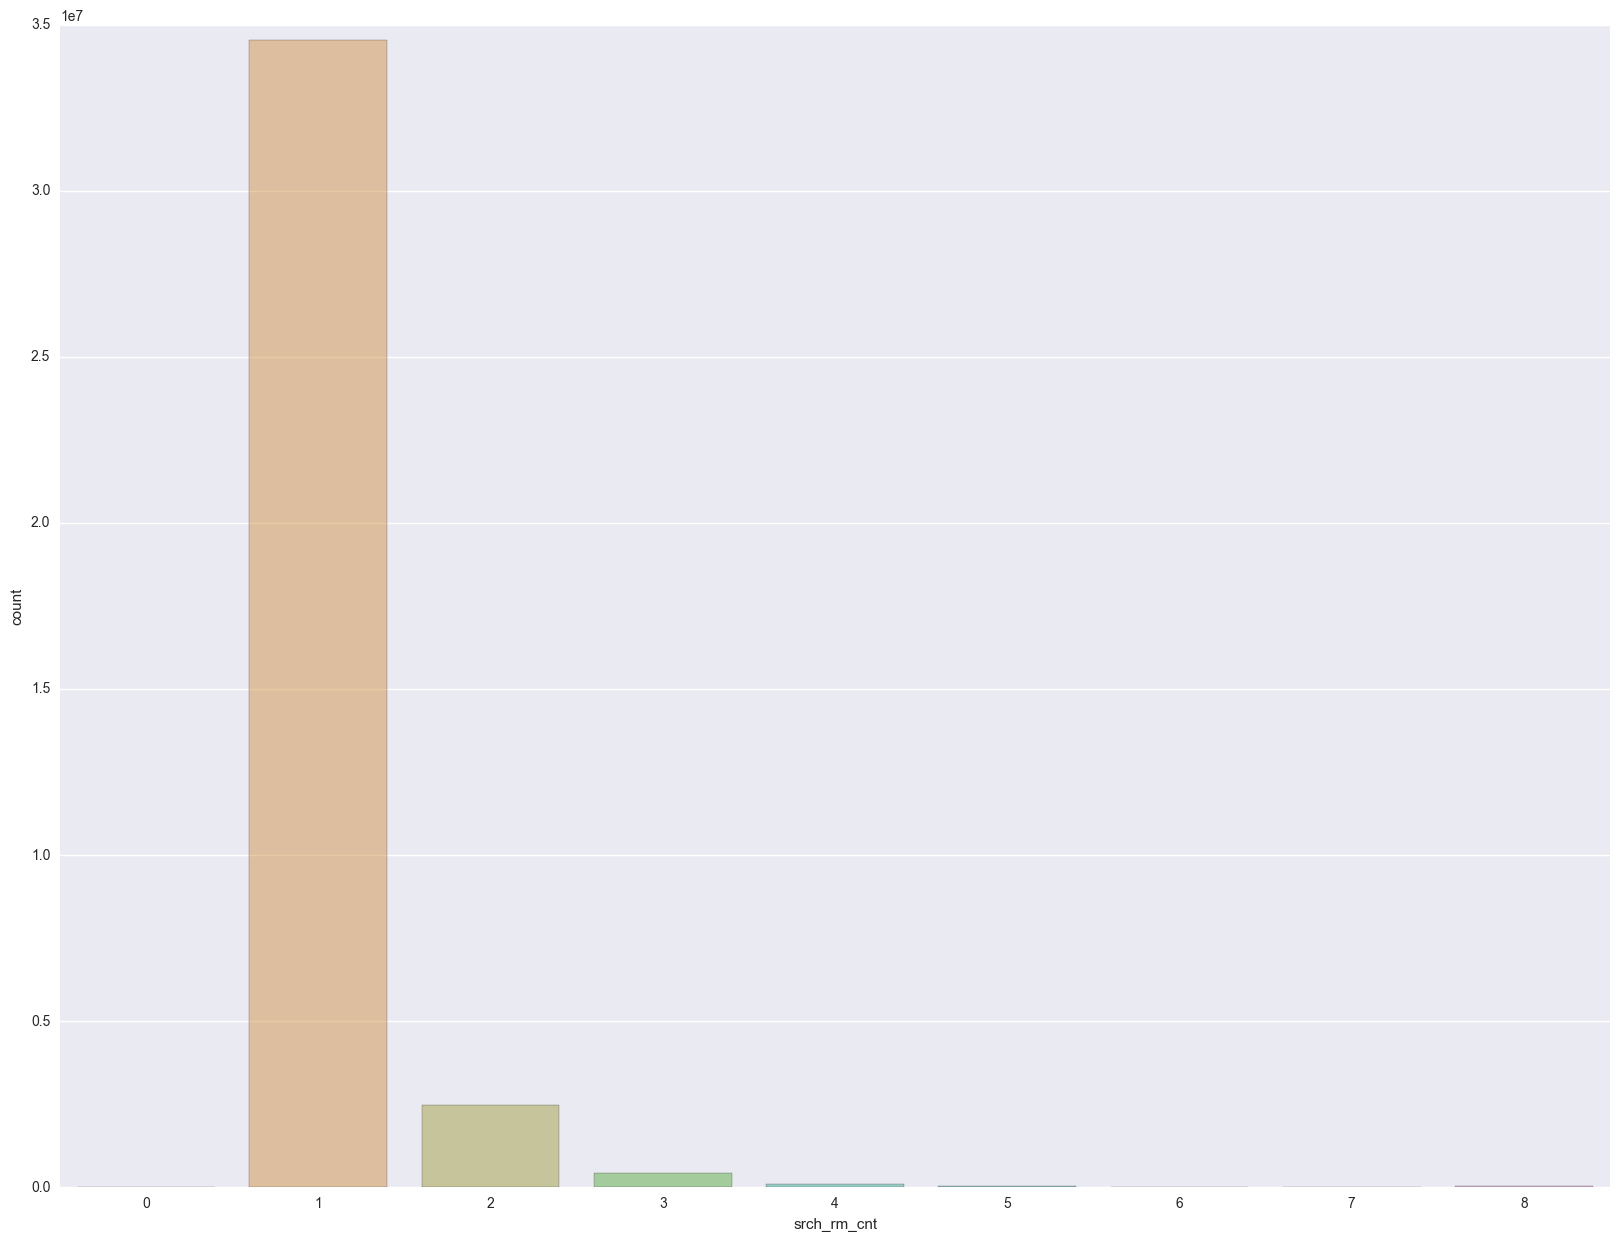

col :  srch_destination_id


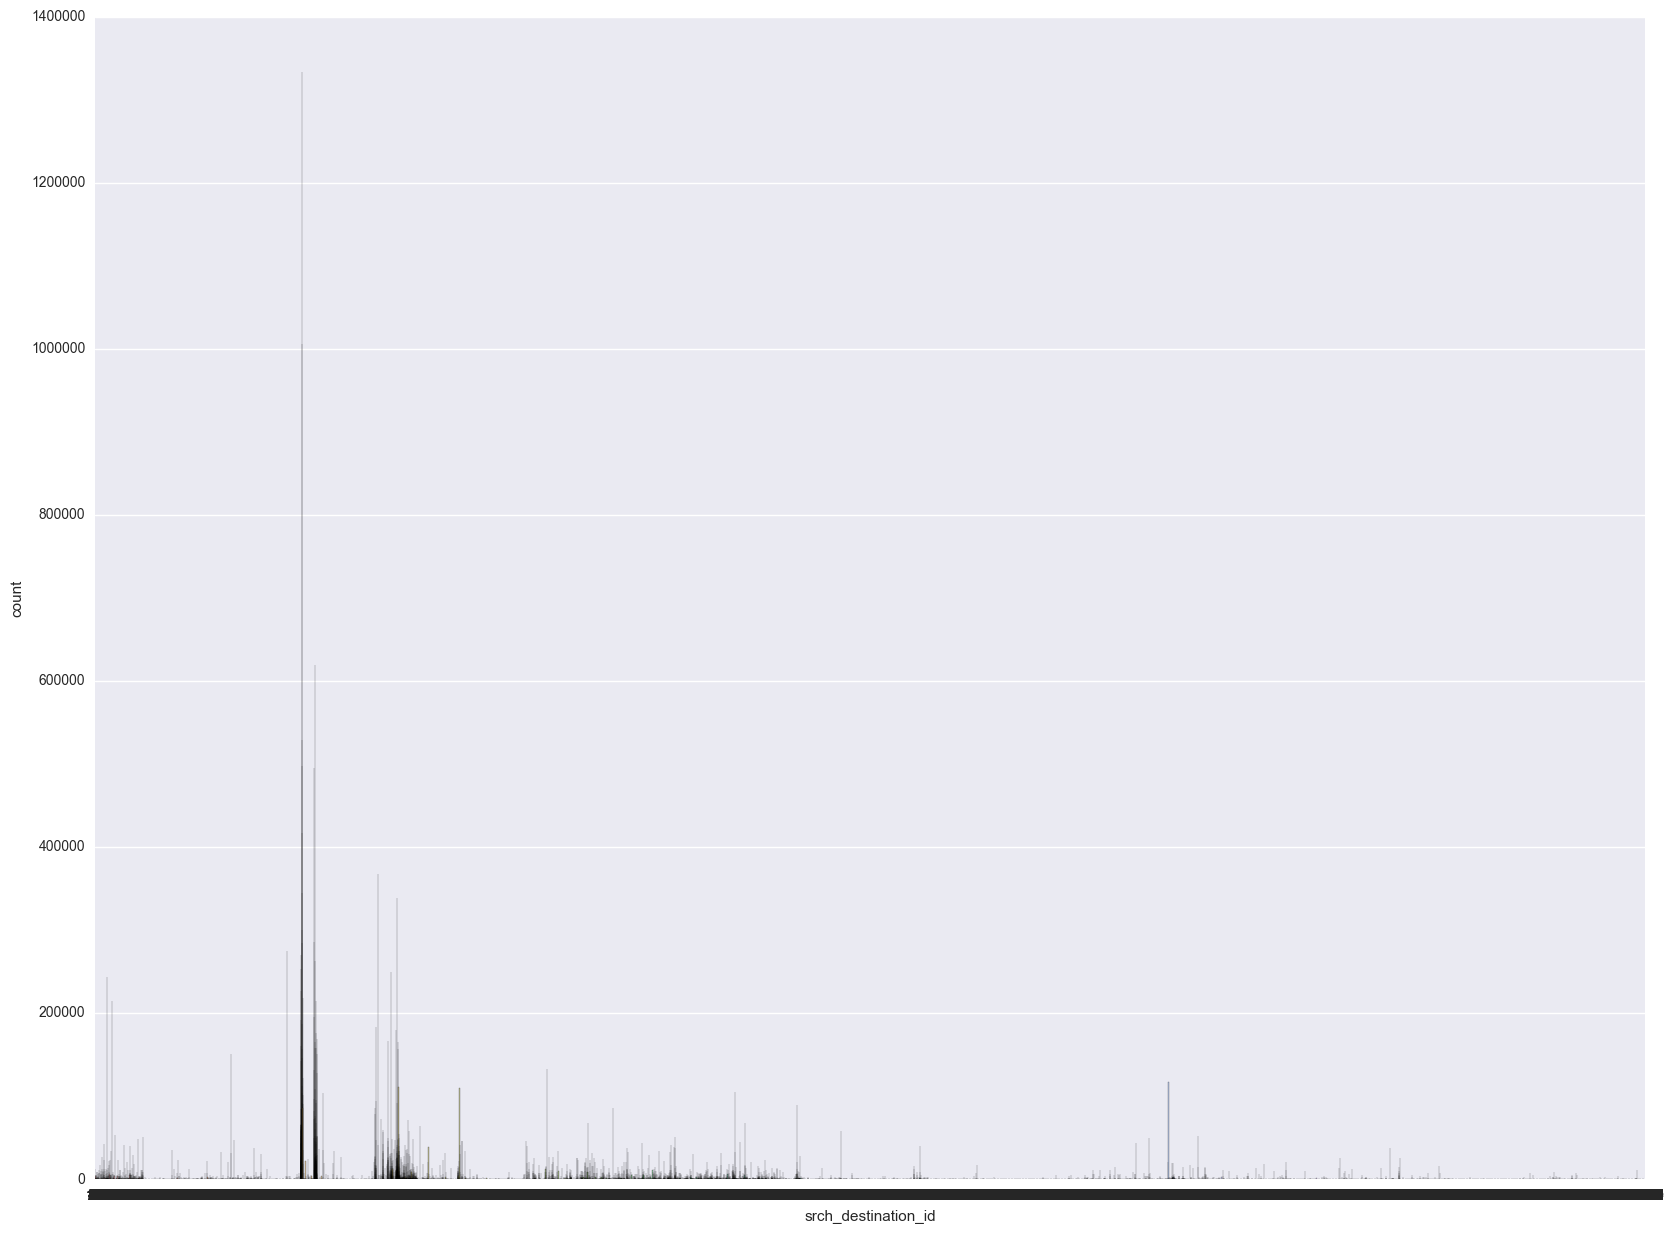

col :  srch_destination_type_id


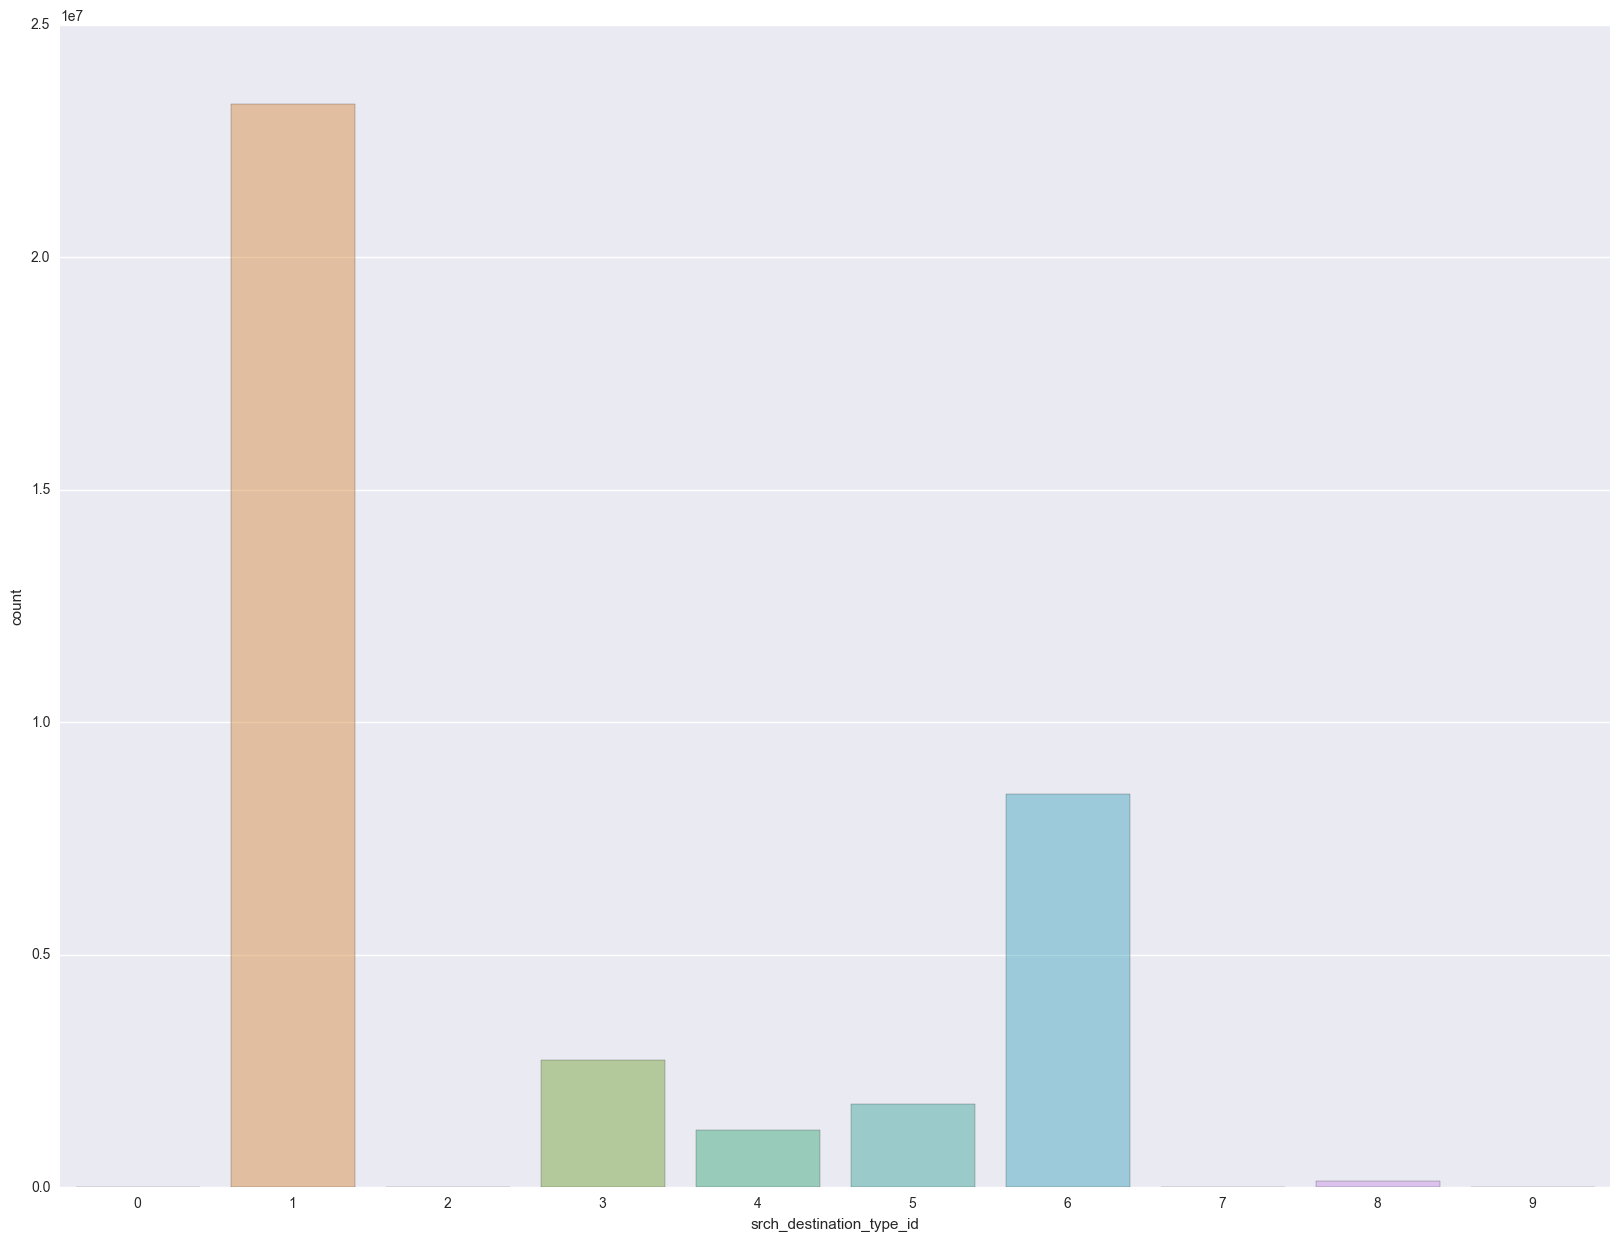

col :  is_booking


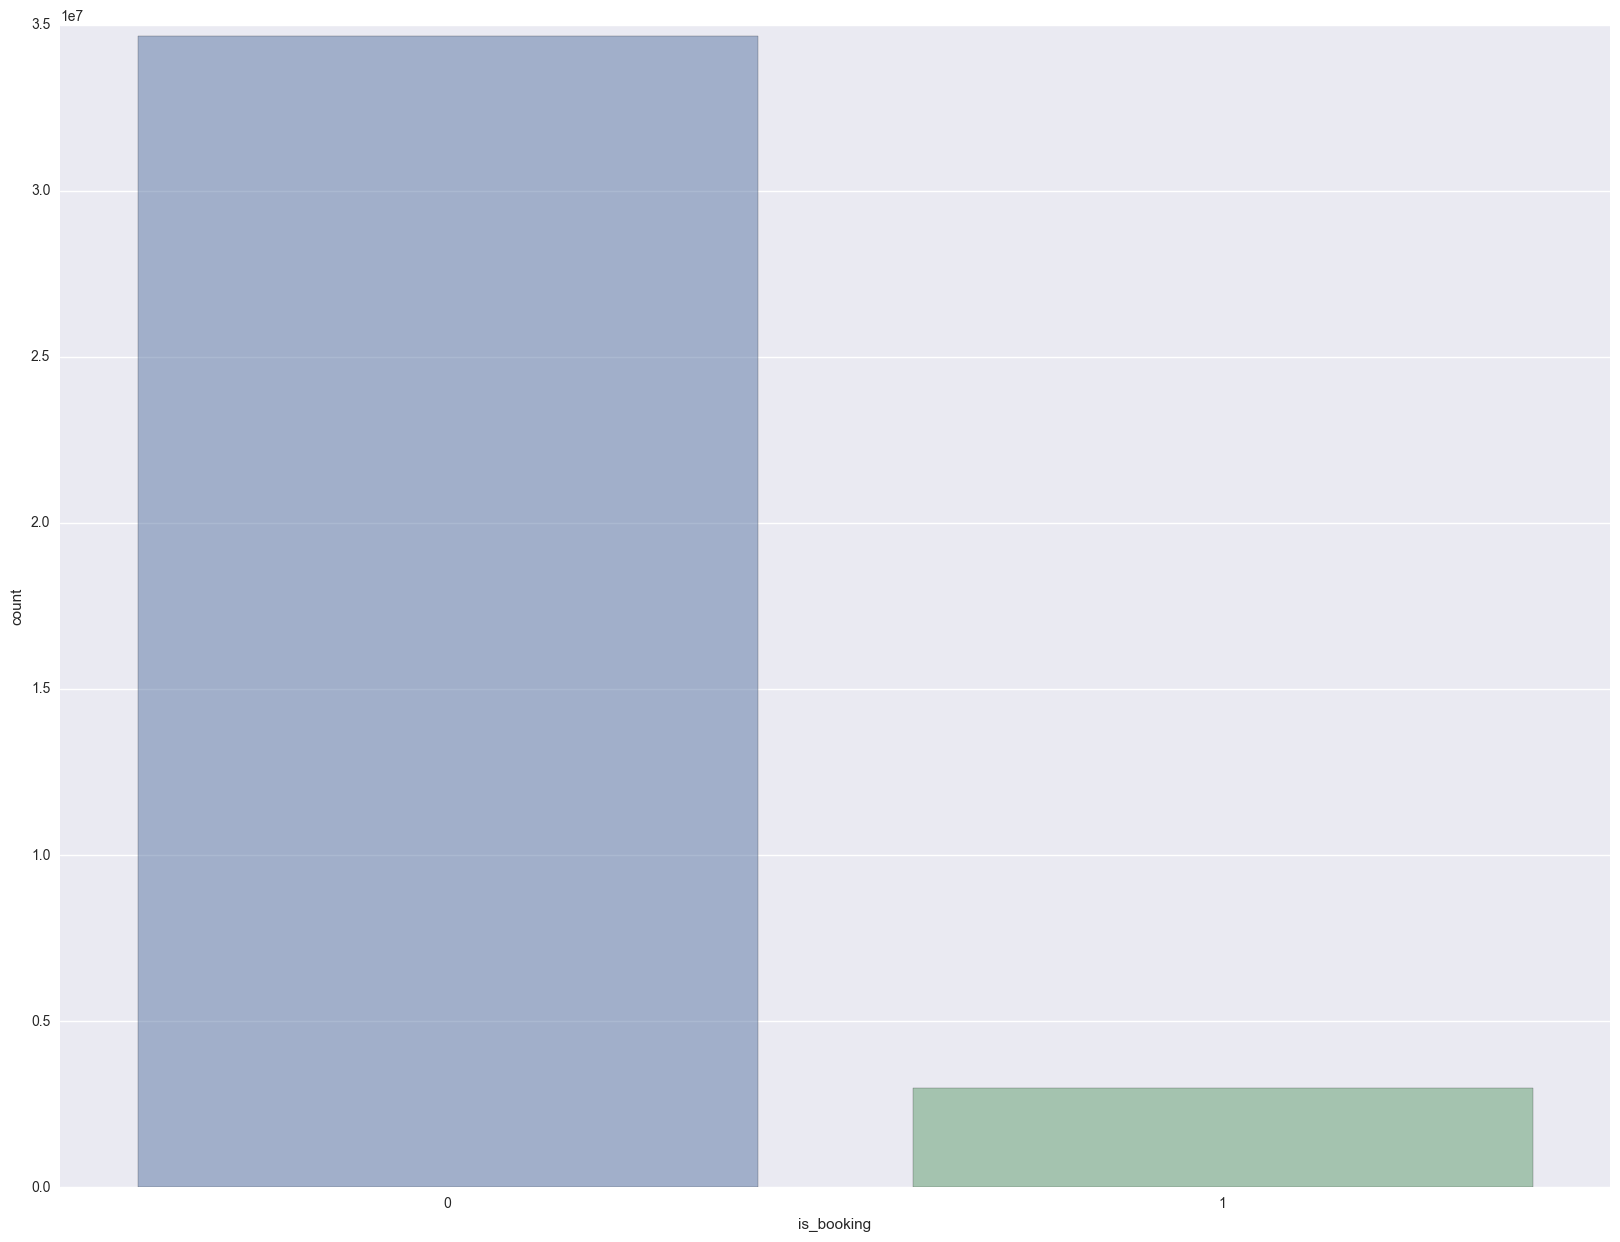

col :  cnt


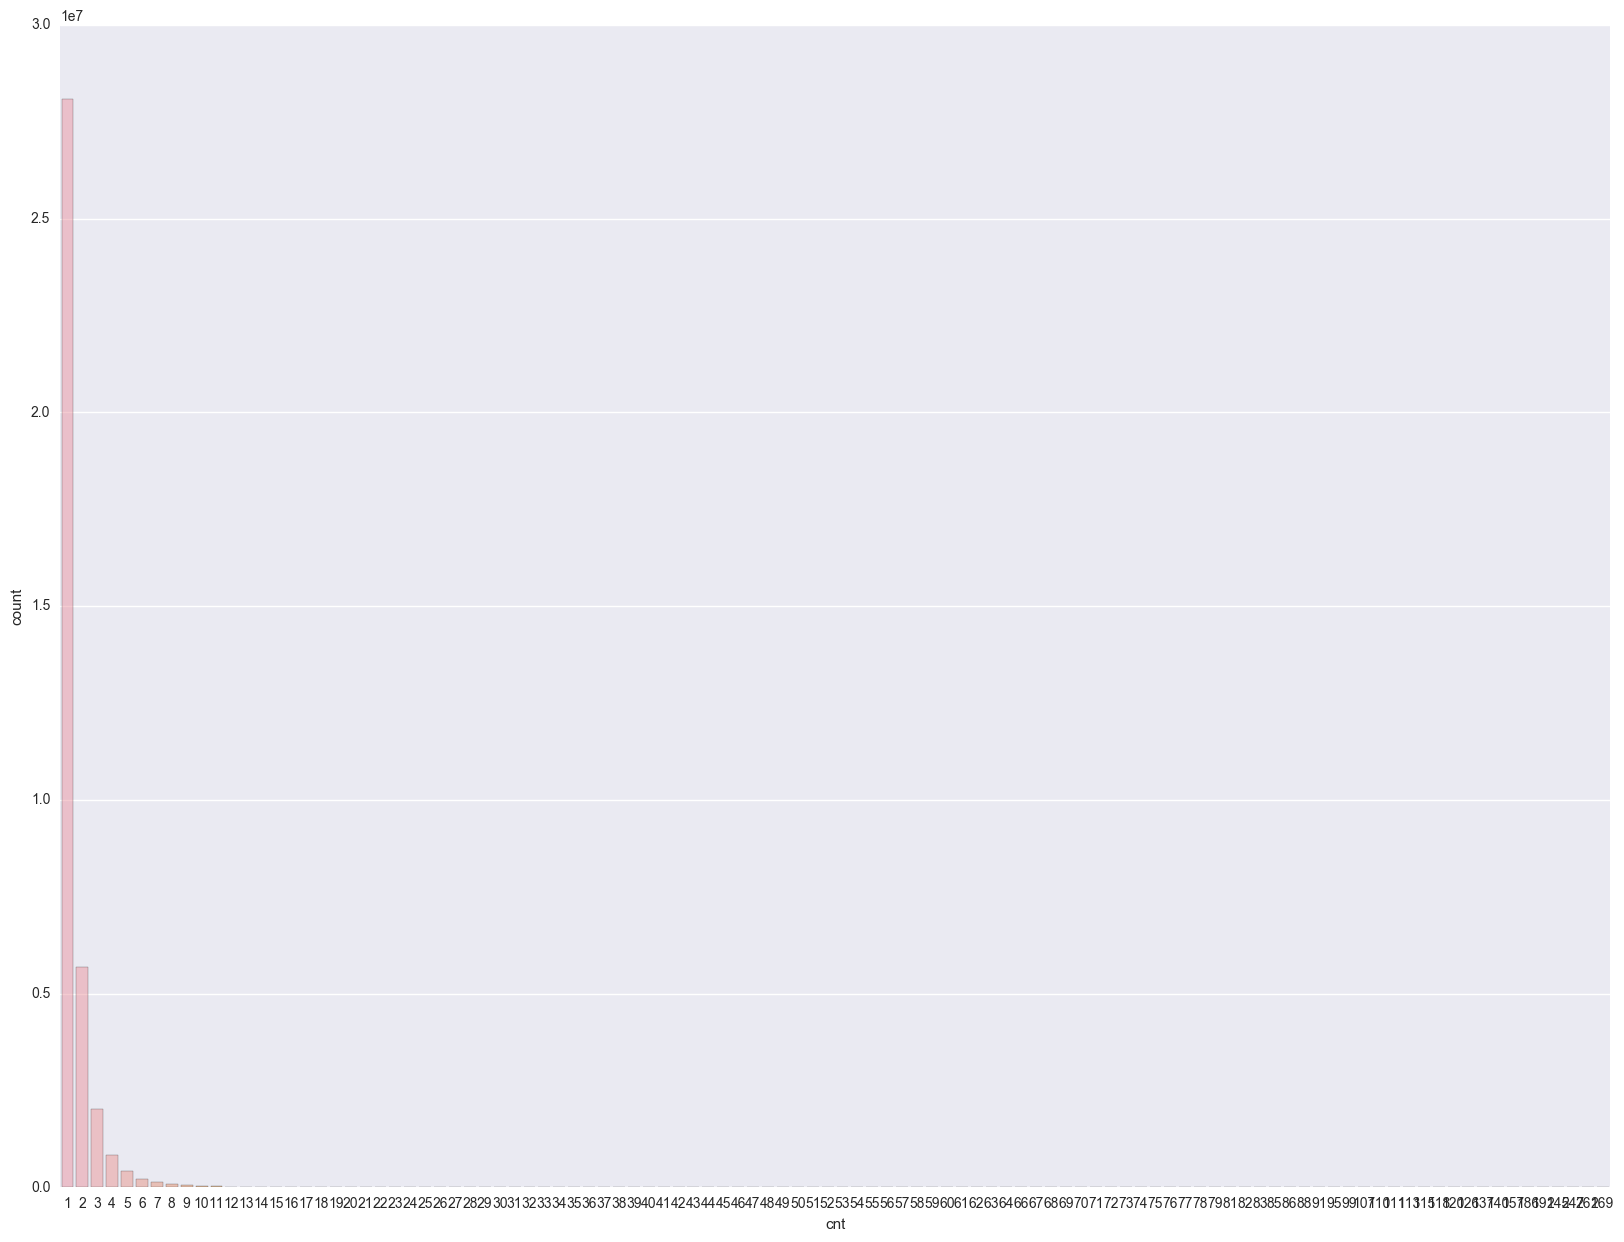

col :  hotel_continent


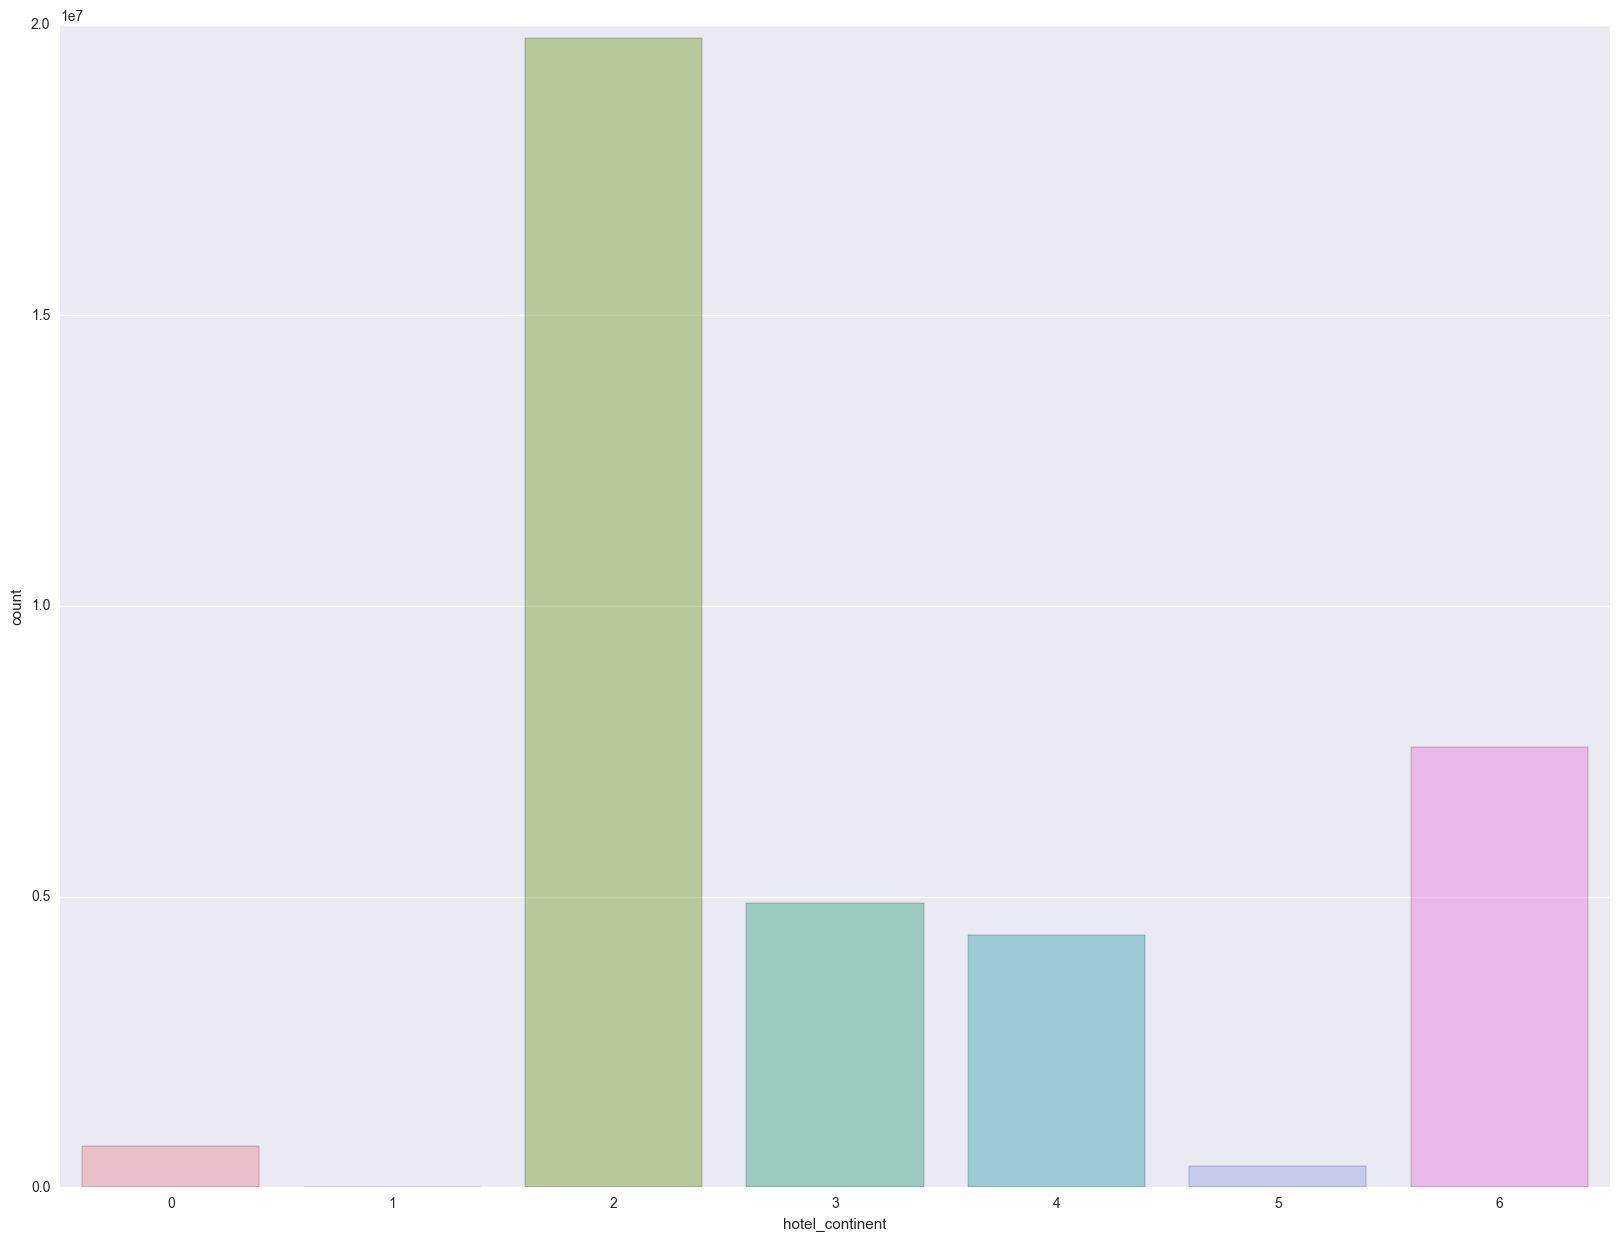

col :  hotel_country


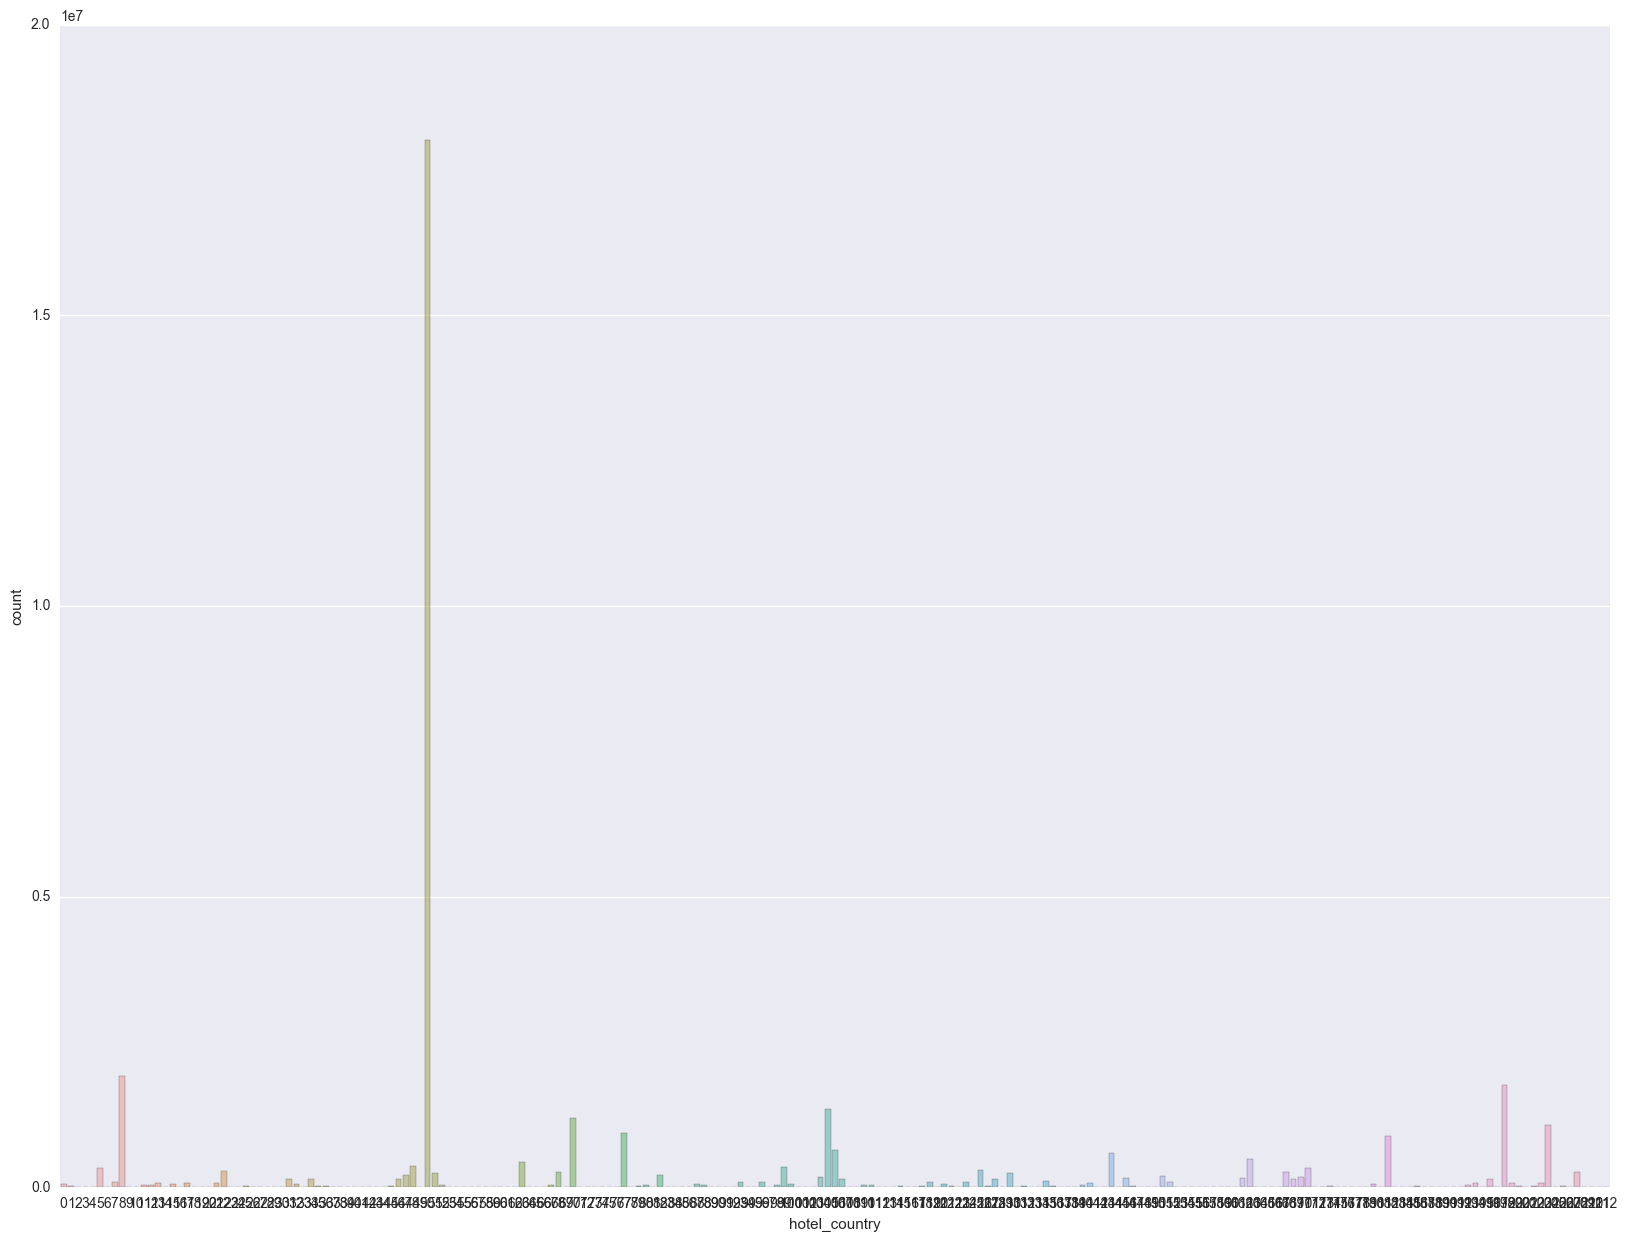

col :  hotel_market


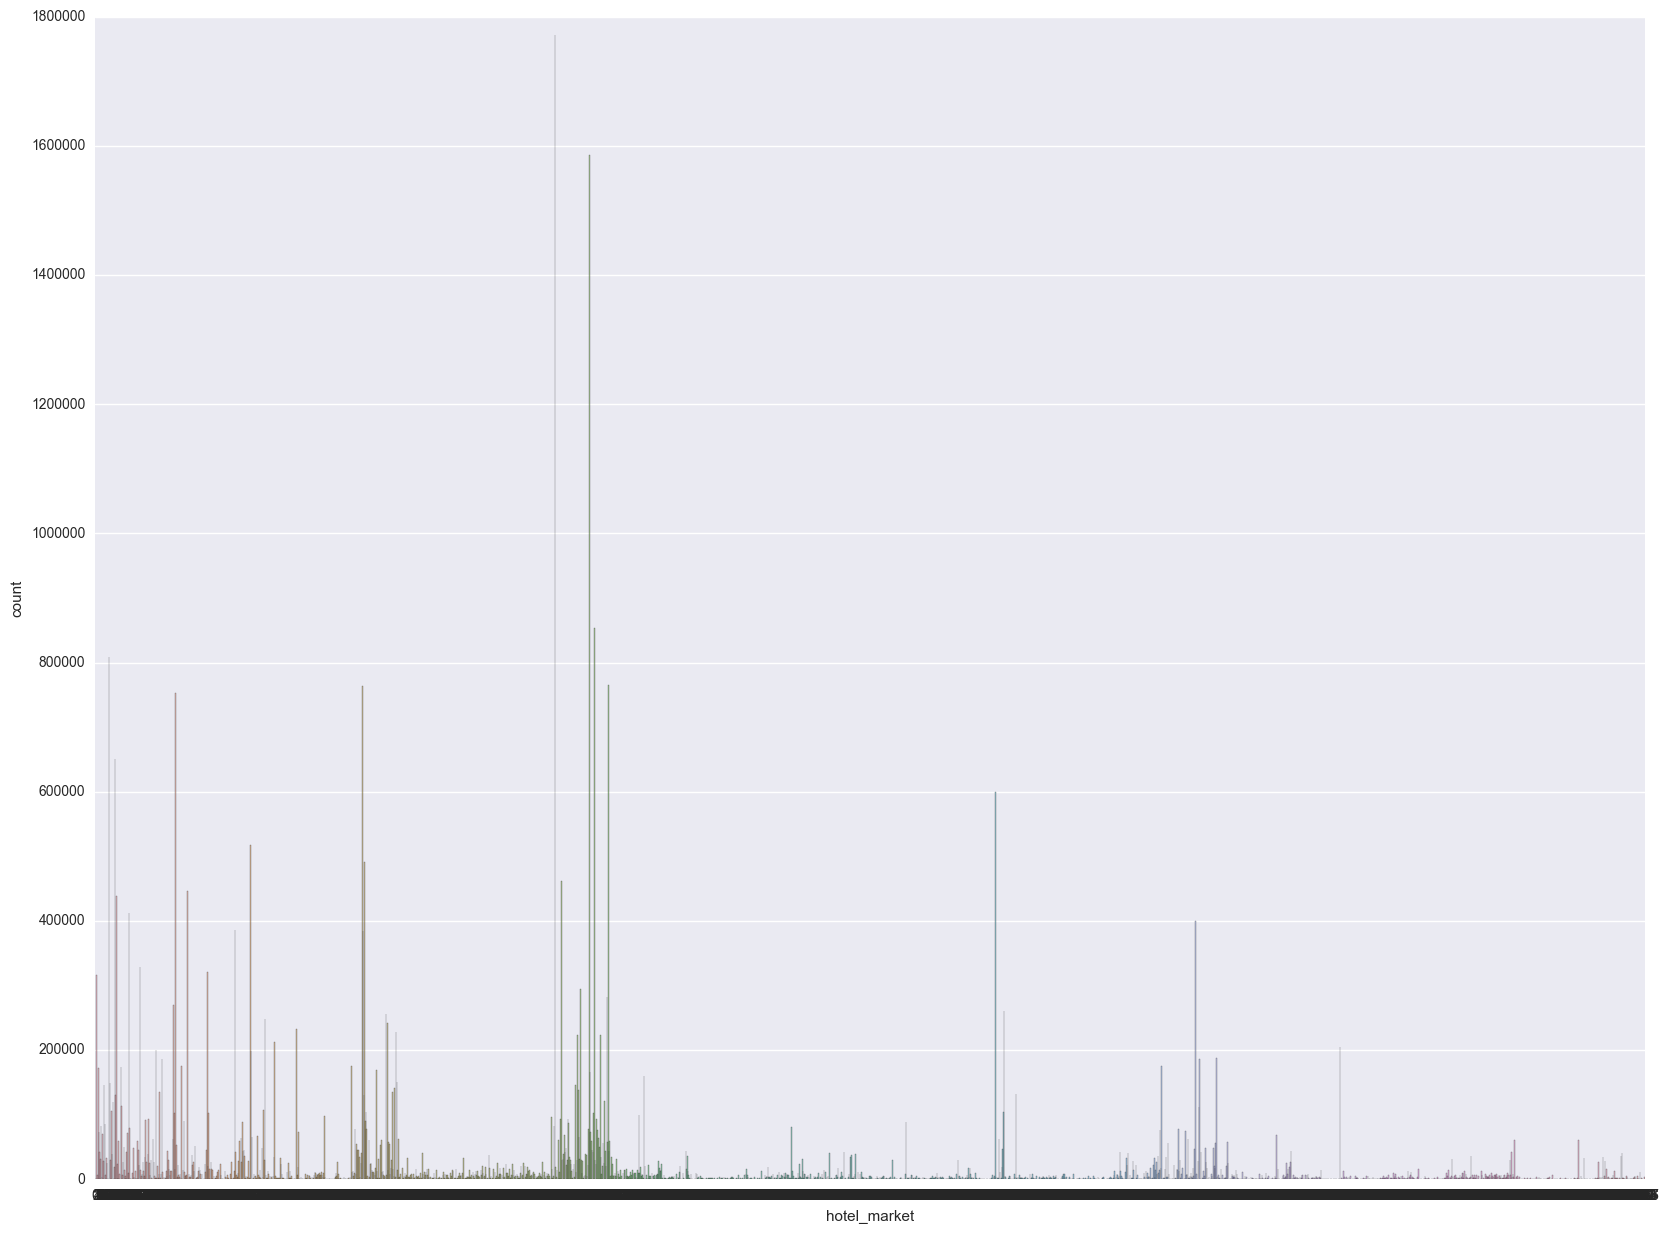

col :  hotel_cluster


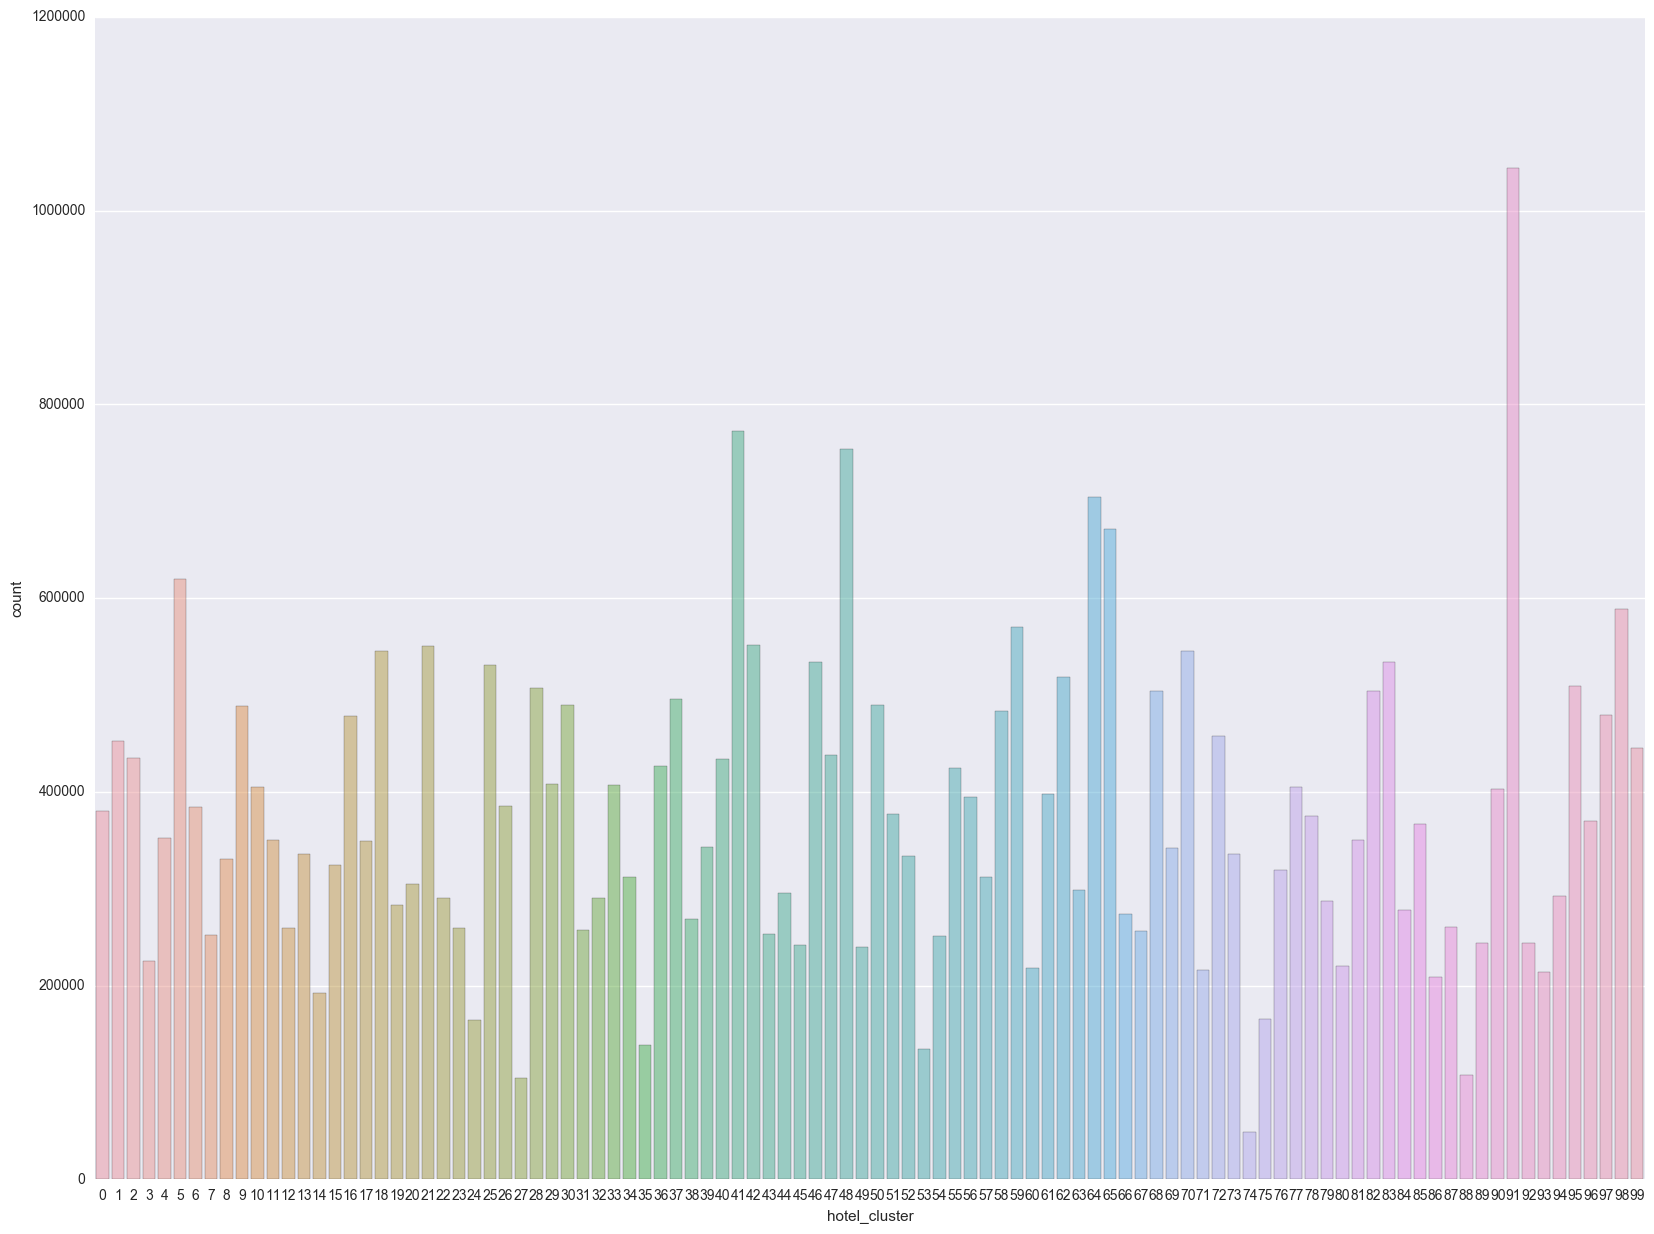

Wall time: 20min 31s


In [5]:
%%time
# histogram of features
skip_cols = ['date_time','orig_destination_distance', 'user_id']
for col in df.columns:
    if col in skip_cols:
        continue
    print('='*50)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=df, alpha=0.5)
    plt.show()

In [ ]:
# site_name : 2가 과도하게 많음 -> 나머지 3,4같은 친구들의 빈도수가 어떻게 될까
# posa_contient : 3이 2.5이상 많음
# user_location_country : 특정 위치가 많음(관광을 많이 가는 나라인가..) / 지금 여기엔 작게 보이는 것들도 아예 없는거에 비해 많은것
# user_location_region : 마찬가지로 특정 지역에서 expedia 검색을 많이 함
# user_location_city : 뾰족한 뾰족한 느낌이 온다
# is_mobile : 0이 압도적으로 많음
# is_package : 0이 압도적으로 많음
# 채널 9 >0 > 1 > 2 > 5 > 3 > 4 ....
# srch_ci : 일정 주기마다 데이터의 양이 반복됨. 이 시기에 대한 무언가가 있지 않을까
# srch_co : check out - check in 몇일 여행을 하는지 일수 feature 추가
# adult : 거의 2명 아니면 혼자 -> 예약하는 인원 수에 따른 무언가가 있지 않을까
# 자녀는 없는 경우가 많고 많으면 1,2
# rm_cnt :  방은 거의 1개 -> 이건 역으로 호텔의 분류를 내가 파악해볼 수 있을 듯
# destination id - 뾰족한 친구가 있음. 음
# destination_type :  1과 6..?
#  is_booking : 0> 1
# cnt : 5번 안에모든 것이 결정된다고 보면 될 것 같은데.. 정확한 비율을 찾아보자
# 호텔이 있는 대륙은 2가 많네
# 호텔 마켓..
# 호텔의 클러스터는 0부터 99까지 100가지가 있음 => 예약하냐 안하냐에 과연 중요한 변수일까


# user_id 사람들의 평균 예약 빈도수를 파악해서 평균 이상인 사람과 평균 이하인 사람으로 구분





In [ ]:
# 내가 여행을 간다면 일단 expedia에서 검색을 해봄 -> 인원 수, 장소, 시간 체크 후 검색
# -> 검색 결과를 훑어봄 (아마 평점이 높은 친구부터, 그리고 expedia가 추천한 것부터 위에서 아래로 봄)
# -> 친구 혹은 같이 가는 사람들에게 링크 전달 
# -> 의논 후 호텔 결정
# -> 항공권과 함께하면 할인되므로 또 고민




In [ ]:
# y : 2015년 booking 0 / 1

# data를 나누어 모델을 만든다면 
# 1) 최근 1년(14년) 데이터 + 빈도가 낮은 호텔 제외
# 2) 여행을 자주 가는 시즌이 있을테니 이런 경우 평준화
# 3) 여행 때문이 아닌 출장을 하는 경우에도 expedia를 사용할 수 있음 -> 별도로 나누어서 빼기
# 


# expeida에서 설정한 호텔 cluster



# 데이터 전처리

# 일단 datetime -> 일과 월로 나누어서 표기(월별/일별 주말, 평일, click 시간이 오전이냐 오후냐 새벽이냐) 
# null값이 있는 distance 체크
# 타 feature에 na값이 있는지 확인하기





In [3]:
%%time

# date_time => datetime 형식으로 변경
df["date_time"] = pd.to_datetime(df["date_time"], coerce=True)

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  app.launch_new_instance()


Wall time: 16.6 s


In [4]:
%%time
df_2013 = df[df["date_time"].dt.year == 2013]

Wall time: 23.8 s


In [5]:
%%time
df_2013.to_csv("train_2013.csv")

Wall time: 2min 26s


In [21]:
%%time
df_2014 = df[df["date_time"].dt.year == 2014]

Wall time: 2min 3s


In [22]:
df_2014.to_csv("train_2014.csv")

In [20]:
df["date_time"].head().dt.year == 2014

0    True
1    True
2    True
3    True
4    True
Name: date_time, dtype: bool

In [7]:
pd.set_option("max_columns", 40)

In [8]:
print(pd.get_option("display.max_columns"))


40
